# Cardiovascular Health Assessment and Risk Prediction Model

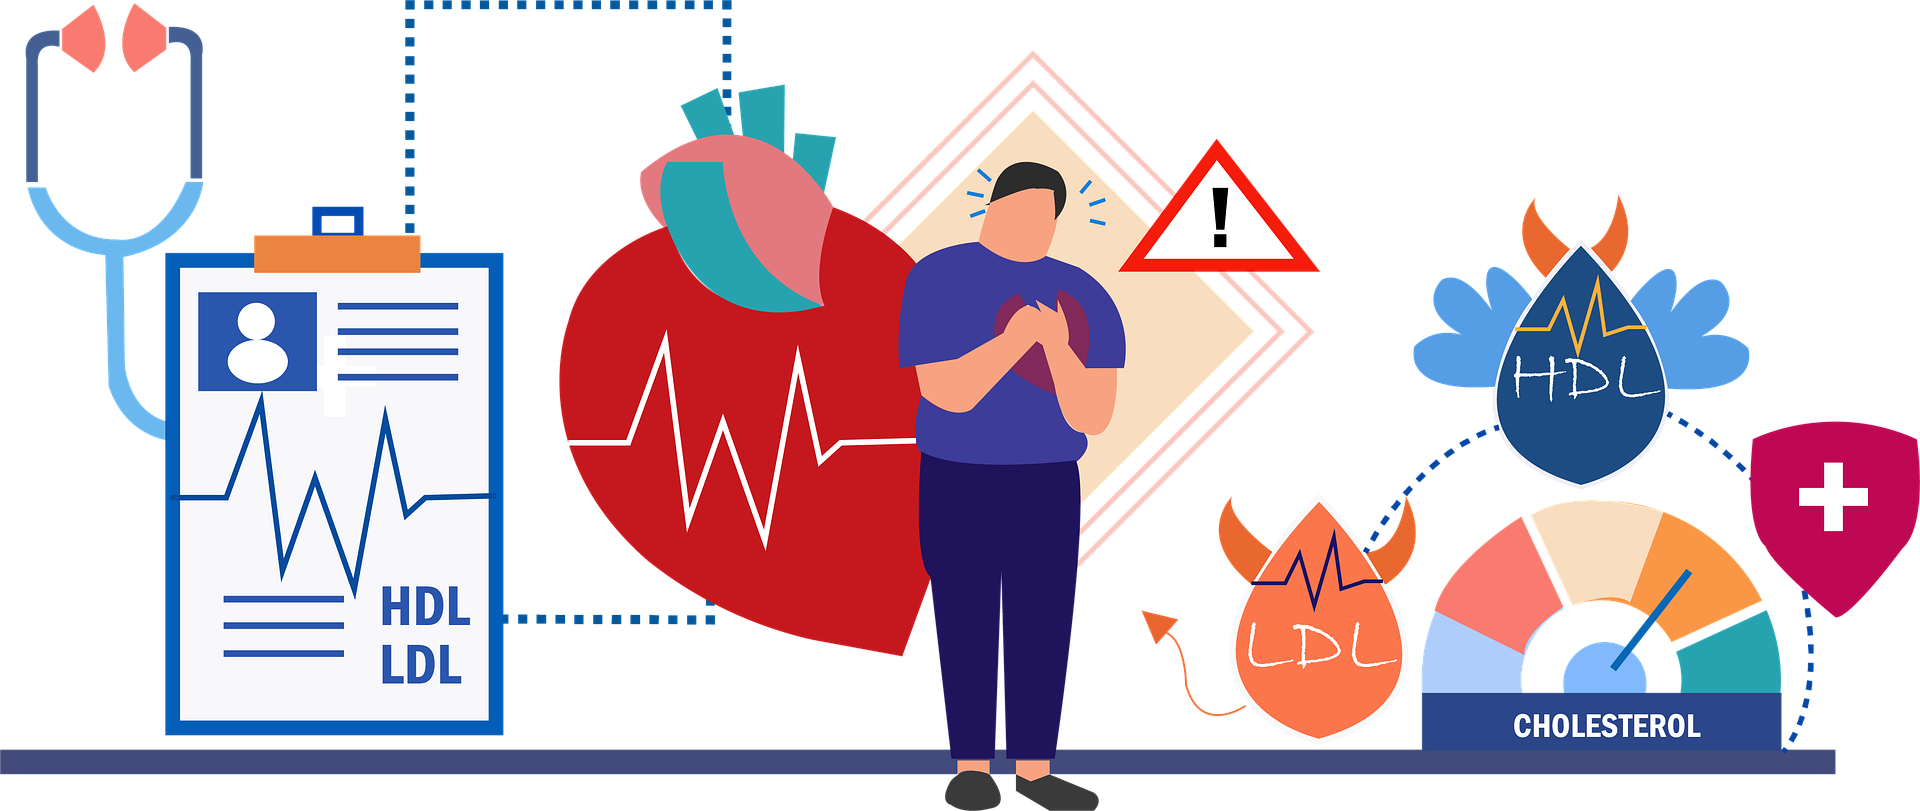

# Problem Statement:

- The task of predicting the 10-year risk of Coronary Heart Disease (CHD) using a dataset from an ongoing cardiovascular study conducted in Framingham, Massachusetts. The dataset comprises demographic, behavioural, and medical risk factors for over 3390 individuals, with a total of 16 attribute variables. The goal is to develop a predictive model that can accurately classify whether a patient is at risk of future CHD based on these factors. Given the prevalence of heart diseases and their impact on public health, this project holds significant importance in the realm of preventive healthcare.

## Objective:

- To predict if someone is at risk of getting heart disease within the next 10 years.
- It is a classification problem.

## Steps included in this project:
1. Importing Libraries
2. Dataset Overview
3. Exploratory Data Analysis & Visualization
4. Data Preprocessing & Feature Engineering
5. Model Building
6. Results
7. Insights

# Importing Libraries

In [1]:
import os 
import numpy as np # linear algebra
import pandas as pd # data processing

# control and manage warnings
import warnings
warnings.filterwarnings('ignore')

# Data visualization setup
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid") # Set the style of seaborn

# Dataset Overview

In [2]:
# Load the dataset from "data_cardiovascular_risk.csv" into a Pandas DataFrame
df = pd.read_csv("data_cardiovascular_risk.csv")
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [3]:
# Display the shape of the dataset
df.shape

(3390, 17)

In [4]:
# Display information about the dataset including data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [5]:
# dropping "id" column
df.drop("id", axis=1, inplace=True)

- "id" is used as a unique identifier for each record.
- It is not relevant for predicting the 10-year risk of coronary heart disease (CHD). 
- Therefore, it is not necessary for our prediction model.
- So, dropping it.

In [6]:
# Statistical description of numerical variables of the dataset
df.describe()

,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


# Duplicates

In [7]:
# Counting the number of duplicated rows
df.duplicated().sum()

0

## Missing Value Treatment

In [8]:
# Compute the count of missing values in each column
missing_values_count = df.isnull().sum()

# Compute the percentage of missing values in each column
missing_values_percentage = (df.isnull().sum() * 100) / len(df)

# Create a DataFrame to display both the count and percentage of missing values
missing_values_summary = pd.DataFrame({
    'Missing Values Count': missing_values_count,
    'Missing Values Percentage': missing_values_percentage
})

print(missing_values_summary)

                 Missing Values Count  Missing Values Percentage
age                                 0                   0.000000
education                          87                   2.566372
sex                                 0                   0.000000
is_smoking                          0                   0.000000
cigsPerDay                         22                   0.648968
BPMeds                             44                   1.297935
prevalentStroke                     0                   0.000000
prevalentHyp                        0                   0.000000
diabetes                            0                   0.000000
totChol                            38                   1.120944
sysBP                               0                   0.000000
diaBP                               0                   0.000000
BMI                                14                   0.412979
heartRate                           1                   0.029499
glucose                  

- "Education" feature represents discrete categories rather than a continuous scale. So we are using Mode for filling the missing values.
- "BPMeds" feature is a nominal variable indicating whether or not the patient was on blood pressure medication. So we are using Mode for filling the missing values.
- "cigsPerDay", "totChol", "BMI", "heartRate", "glucose" are continuous. So we are using Median for filling the missing values.

In [9]:
# Impute missing values with appropriate strategies
df['education'].fillna(df['education'].mode()[0], inplace=True)  # Replace missing values in 'education' with the mode 
df['cigsPerDay'].fillna(df['cigsPerDay'].median(), inplace=True)  # Replace missing values in 'cigsPerDay' with the median 
df['BPMeds'].fillna(df['BPMeds'].mode()[0], inplace=True)  # Replace missing values in 'BPMeds' with the median
df['totChol'].fillna(df['totChol'].median(), inplace=True)  # Replace missing values in 'totChol' with the median
df['BMI'].fillna(df['BMI'].median(), inplace=True)  # Replace missing values in 'BMI' with the median
df['heartRate'].fillna(df['heartRate'].median(), inplace=True)  # Replace missing values in 'heartRate' with the median
df['glucose'].fillna(df['glucose'].median(), inplace=True)  # Replace missing values in 'glucose' with the median

In [10]:
# checking missing values in each column
df.isnull().sum()

age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

# EDA

## TenYearCHD - Target Variable

In [11]:
# Count occurrences of each category in TenYearCHD
chd_counts = df['TenYearCHD'].value_counts()
chd_counts

0    2879
1     511
Name: TenYearCHD, dtype: int64

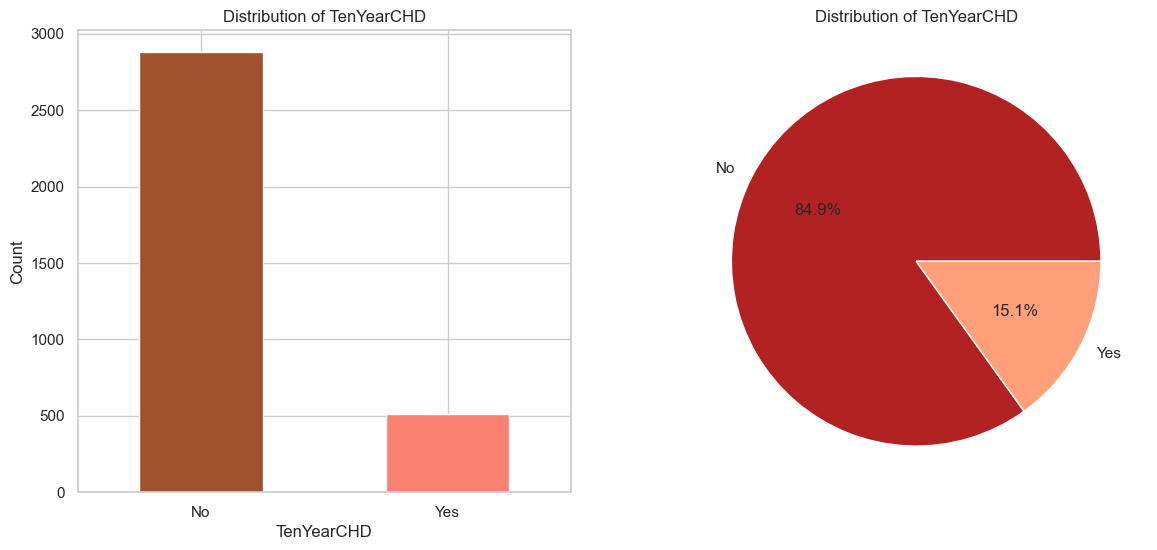

<Figure size 640x480 with 0 Axes>

In [12]:
# Set up the subplots
plt.figure(figsize=(14, 6))

# Plot for sysBP
plt.subplot(1, 2, 1)
chd_counts.plot(kind='bar', color=['Sienna', 'salmon'])
plt.title('Distribution of TenYearCHD')
plt.xlabel('TenYearCHD')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'], rotation=0)

# Plot for diaBP
plt.subplot(1, 2, 2)
plt.pie(chd_counts, labels=['No', 'Yes'], autopct='%1.1f%%', colors=['FireBrick', 'LightSalmon'])
plt.title('Distribution of TenYearCHD')
plt.show()

# Show plots
plt.tight_layout()
plt.show()

- Out of all the individuals, 2879 (about 85%) were predicted to not have a risk of CHD in the next ten years, while 511 (about 15%) were predicted to have a risk.
- The distribution is imbalanced, with far more individuals predicted as not having TenYearCHD compared to those predicted as having it.
- So we have to balance it for further analysis.

## Age

In [13]:
# Calculate counts of age and sort them by age
age_counts = df['age'].value_counts().sort_index()
age_counts

32      1
33      4
34     16
35     29
36     75
37     73
38    119
39    139
40    148
41    144
42    145
43    127
44    135
45    131
46    140
47    108
48    134
49    104
50    115
51    114
52    118
53    114
54    107
55    116
56     92
57     97
58     95
59     93
60     95
61     87
62     80
63     93
64     75
65     43
66     30
67     33
68     14
69      5
70      2
Name: age, dtype: int64

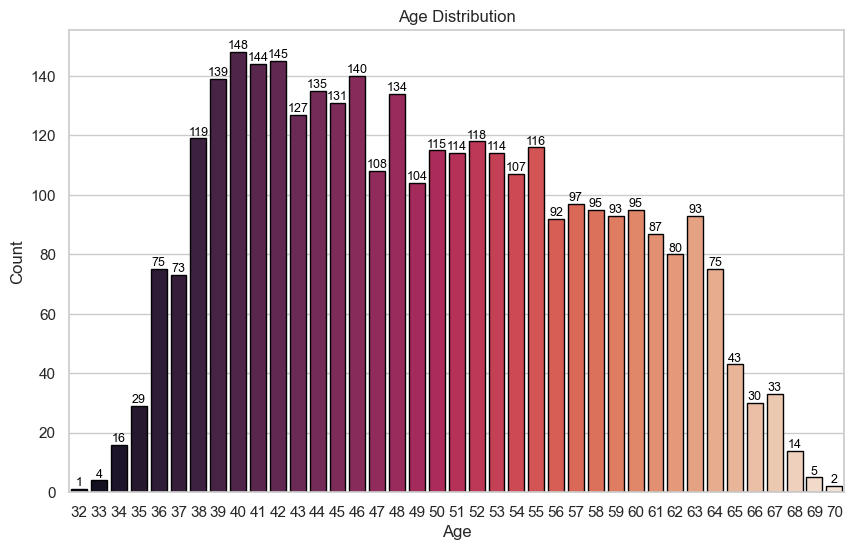

In [14]:
# Set figure size
plt.figure(figsize=(10, 6))

# Create bar plot
sns.barplot(x=age_counts.index, y=age_counts,  palette='rocket', edgecolor='black')

# Adding annotations to the bars
for index, value in enumerate(age_counts):
    plt.text(index, value, str(value), ha='center', va='bottom', color='black', fontsize=9)

# Set plot title and labels
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

- More people in the dataset are between ages 39 to 42 and ages 44 to 46. These age groups have the highest number of individuals compared to other ages.
- The distribution is somewhat right-skewed, with more people in younger to middle-aged groups than in older age groups.

### Age with TenYearCHD

In [15]:
# Count of individuals by age and TenYearCHD
chd_vs_age_df = df.groupby(['age', 'TenYearCHD']).size().unstack(fill_value=0)

# Rename columns
chd_vs_age_df = chd_vs_age_df.rename(columns={0: 'No CHD', 1: 'With CHD'})
chd_vs_age_df

TenYearCHD,No CHD,With CHD
age,,
32,1,0
33,4,0
34,16,0
35,27,2
36,72,3
37,71,2
38,112,7
39,134,5
40,137,11


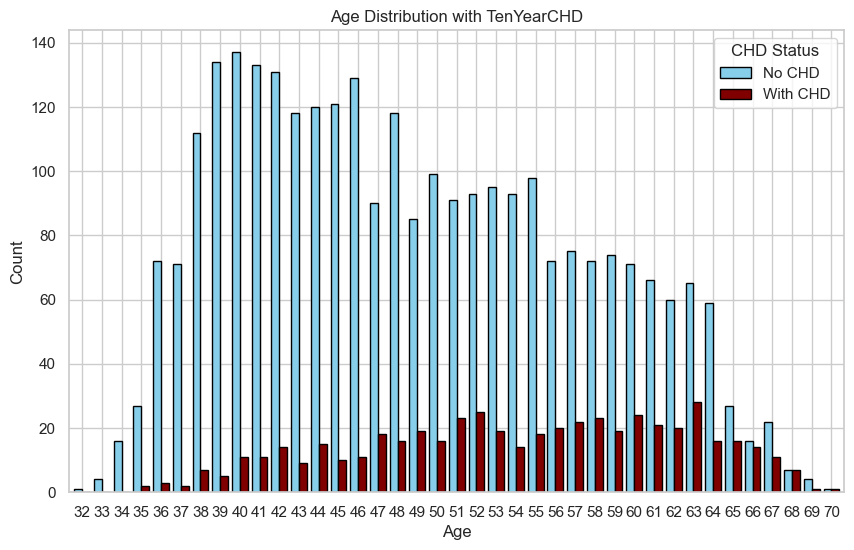

In [16]:
chd_vs_age_df.plot(kind='bar', figsize=(10, 6), width=0.8, color=['skyblue', 'maroon'], edgecolor='black')  # Adjust width as desired

# Set plot title and labels
plt.title('Age Distribution with TenYearCHD')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='CHD Status')
plt.xticks(rotation=0)
plt.show()

- We know that As people get older, there are more individuals with CHD.
- This trend starts around age 35 and continues up to age 70.
- More people, both with and without CHD, are found in age groups around 38 to 46.
- There are fewer individuals, both with and without CHD, in older age groups like 65 and above.
- Overall, CHD risk tends to increase with age, with a peak in middle age, and then decreases in older age groups.

### Age, Sex and TenYearCHD

In [17]:
# Count of individuals without CHD for each age group, sex, and TenYearCHD
no_chd_counts_by_age_sex = df[(df['TenYearCHD'] == 0)].groupby(['age', 'sex'])['TenYearCHD'].count().unstack(fill_value=0)

# Count of individuals with CHD for each age group, sex, and TenYearCHD
chd_counts_by_age_sex = df[(df['TenYearCHD'] == 1)].groupby(['age', 'sex'])['TenYearCHD'].count().unstack(fill_value=0)

# Concatenate the dataframes along the columns axis
chd_vs_age_sex_df = pd.concat([no_chd_counts_by_age_sex, chd_counts_by_age_sex], axis=1, keys=['No CHD', 'With CHD'])
chd_vs_age_sex_df

No CHD     With CHD      
sex      F   M        F     M
age                          
32       1   0      NaN   NaN
33       2   2      NaN   NaN
34      11   5      NaN   NaN
35      14  13      1.0   1.0
36      33  39      1.0   2.0
37      41  30      1.0   1.0
38      59  53      2.0   5.0
39      73  61      2.0   3.0
40      78  59      6.0   5.0
41      72  61      3.0   8.0
42      73  58      5.0   9.0
43      66  52      3.0   6.0
44      59  61      6.0   9.0
45      67  54      4.0   6.0
46      90  39     10.0   1.0
47      60  30      8.0  10.0
48      62  56      7.0   9.0
49      54  31      7.0  12.0
50      58  41      5.0  11.0
51      57  34      6.0  17.0
52      52  41      9.0  16.0
53      54  41     13.0   6.0
54      63  30      3.0  11.0
55      66  32     13.0   5.0
56      44  28      7.0  13.0
57      40  35     12.0  10.0
58      41  31     14.0   9.0
59      47  27     13.0   6.0
60      39  32      9.0  15.0
61      44  22     11.0  10.0
62      35  25      7.0  13.0
63      40  25     17.0  11.0
64      38  21      7.0   9.0
65      17  10      9.0   7.0
66       9   7     10.0   4.0
67      18   4      6.0   5.0
68       3   4      1.0   6.0
69       3   1      0.0   1.0
70       1   0      1.0   0.0

- In the age group of 40-44, there are 78 females and 59 males without CHD, while there are 6 females and 5 males with CHD.

## Education

In [18]:
# Count of individuals by education
education_counts = df['education'].value_counts()
education_counts

1.0    1478
2.0     990
3.0     549
4.0     373
Name: education, dtype: int64

In [19]:
df1 = df.copy()
df1.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [20]:
# Define a dictionary to map numerical education levels to their labels
education_mapping = {
    1.0: 'Higher Secondary',
    2.0: 'Graduate',
    3.0: 'Post Graduate',
    4.0: 'Doctorate or PhD'
}

# Replace numerical education levels with their corresponding labels in the DataFrame
df1['education'] = df['education'].map(education_mapping)

# Now, the 'education' column will contain the labels instead of numerical values

In [21]:
education_counts_1 = df1['education'].value_counts()
education_counts_1

Higher Secondary    1478
Graduate             990
Post Graduate        549
Doctorate or PhD     373
Name: education, dtype: int64

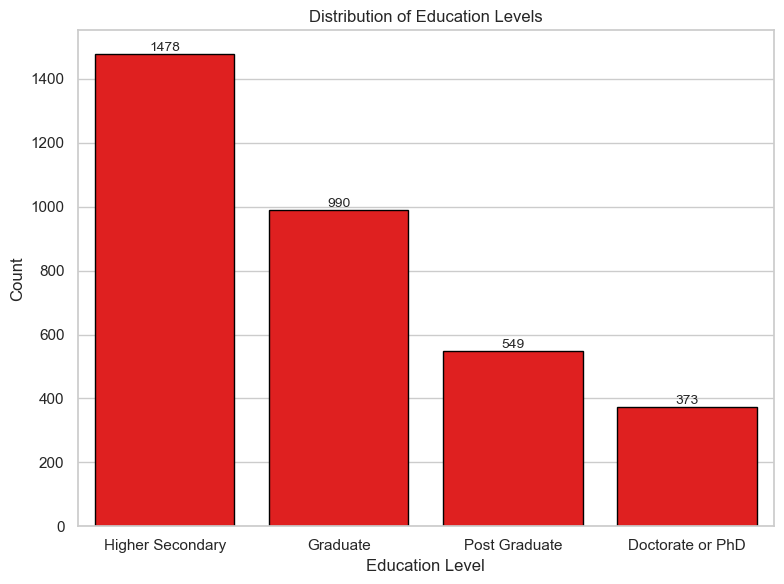

In [22]:
# Create bar plot 
plt.figure(figsize=(8, 6))
sns.barplot(x=education_counts_1.index, y=education_counts_1.values, color='red', edgecolor='black')

# Add annotations
for i, count in enumerate(education_counts_1):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=10)

# Set plot title and labels
plt.title('Distribution of Education Levels')
plt.xlabel('Education Level')
plt.ylabel('Count')

# Show plot
plt.tight_layout()
plt.show()

- The majority of individuals in the dataset have attained a "Higher Secondary" education, followed by "Graduate," "Post Graduate," and "Doctorate or PhD".

### Education with TenYearCHD

In [23]:
# Count of individuals with CHD for each education level
chd_counts_by_education = df1[df1['TenYearCHD'] == 1]['education'].value_counts()

# Count of individuals without CHD for each education level
no_chd_counts_by_education = df1[df1['TenYearCHD'] == 0]['education'].value_counts()

# Combine the counts into a DataFrame
chd_vs_education_df = pd.DataFrame({'With CHD': chd_counts_by_education, 'No CHD': no_chd_counts_by_education})
chd_vs_education_df

,With CHD,No CHD
Higher Secondary,269,1209
Graduate,118,872
Post Graduate,70,479
Doctorate or PhD,54,319


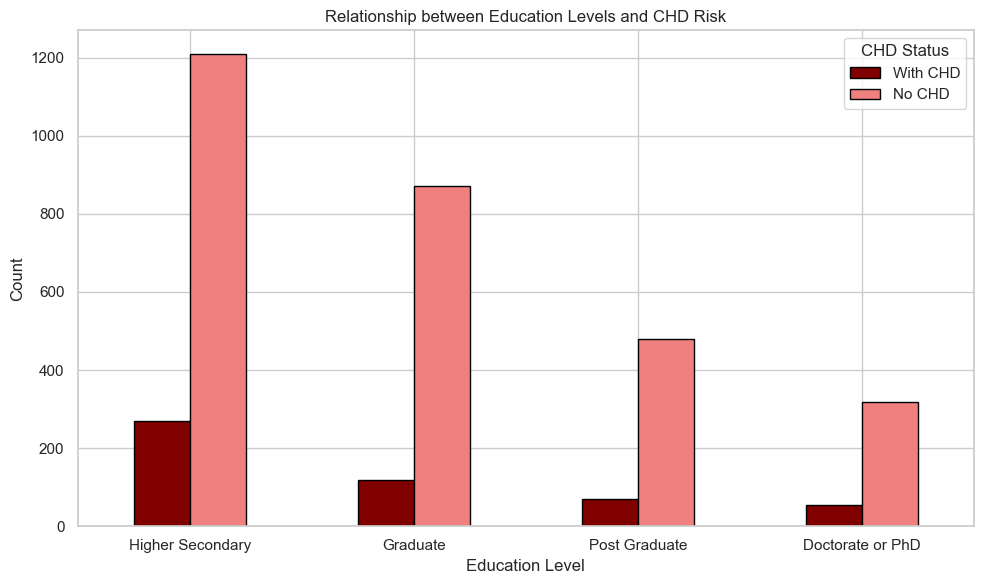

In [24]:
# Plotting the relationship between education levels and CHD risk
chd_vs_education_df.plot(kind='bar', figsize=(10, 6), color=['Maroon', 'lightcoral'], edgecolor='black')

# Set plot title and labels
plt.title('Relationship between Education Levels and CHD Risk')
plt.xlabel('Education Level')
plt.ylabel('Count')

plt.legend(title='CHD Status')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

- These trends suggest that there may be a relationship between education level and CHD risk.
- People those who finished "Higher Secondary" or "Graduate" studies, have more cases of CHD compared to those with higher education, such as "Post Graduate" or "Doctorate or PhD."

## Sex

In [25]:
# Count the occurrences of each sex
sex_counts = df['sex'].value_counts()
sex_counts

F    1923
M    1467
Name: sex, dtype: int64

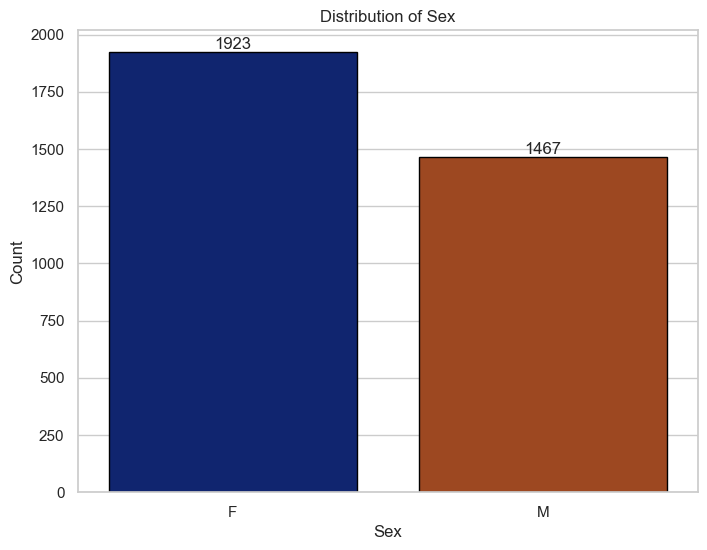

In [26]:
# Plotting the distribution of sex
plt.figure(figsize=(8, 6))
sns.barplot(x=sex_counts.index, y=sex_counts.values, palette='dark', edgecolor='black')

# Add annotations to the bars
for i, count in enumerate(sex_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom')

# Set plot title and labels
plt.title('Distribution of Sex')
plt.xlabel('Sex')
plt.ylabel('Count')

# Show plot
plt.show()

- There are 1923 females and 1467 males in the dataset.
-  we can say that there are significantly more females in the dataset than males.

### sex with TenYearCHD

In [27]:
# Count of individuals with CHD for sex 
chd_counts_by_sex = df[df['TenYearCHD'] == 1]['sex'].value_counts()

# Count of individuals without CHD for sex
no_chd_counts_by_sex = df[df['TenYearCHD'] == 0]['sex'].value_counts()

# Combine the counts into a DataFrame
chd_vs_sex_df = pd.DataFrame({'With CHD': chd_counts_by_sex, 'No CHD': no_chd_counts_by_sex})
chd_vs_sex_df

,With CHD,No CHD
F,239,1684
M,272,1195


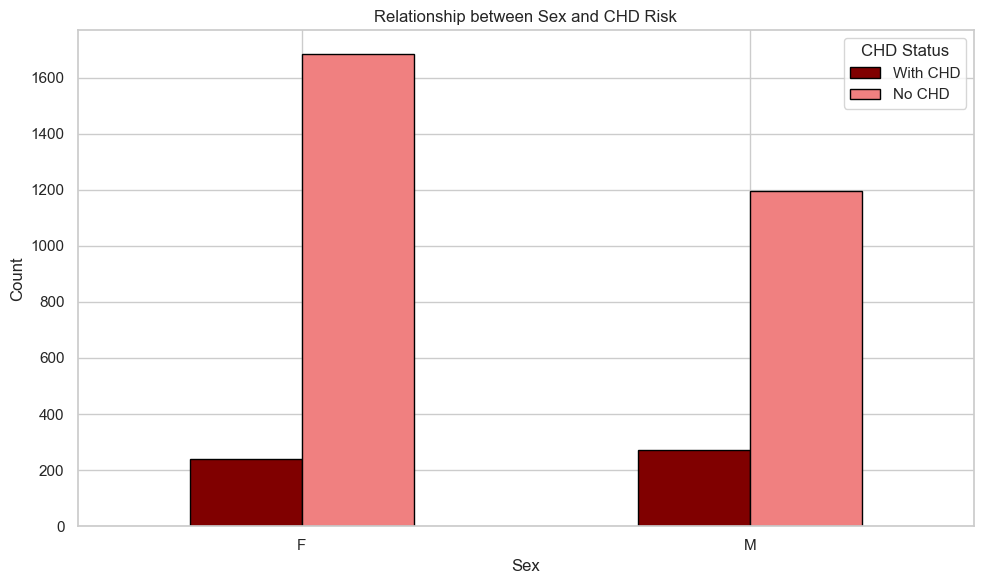

In [28]:
# Plotting the relationship between sex and CHD risk
chd_vs_sex_df.plot(kind='bar', figsize=(10, 6), color=['Maroon', 'lightcoral'], edgecolor='black')

# Set plot title and labels
plt.title('Relationship between Sex and CHD Risk')
plt.xlabel('Sex')
plt.ylabel('Count')

plt.legend(title='CHD Status')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

- Among females (F), there are 239 individuals with CHD and 1684 individuals without CHD.
- Among males (M), there are 272 individuals with CHD and 1195 individuals without CHD.
- Among females, there are fewer individuals with CHD (239) compared to males (272), indicating that males may have a slightly higher risk of developing CHD within ten years compared to females.

## is_smoking 

In [29]:
# Count the occurrences of each category in the 'is_smoking' column
smoking_counts = df['is_smoking'].value_counts()
smoking_counts

NO     1703
YES    1687
Name: is_smoking, dtype: int64

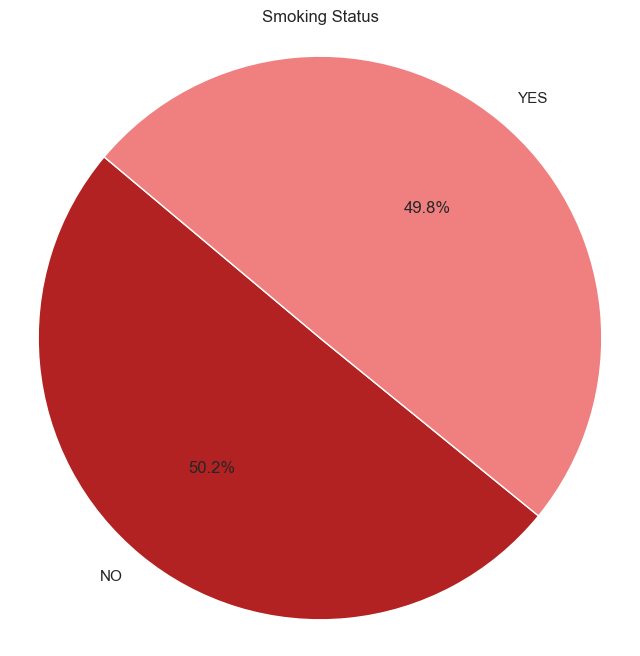

In [30]:
# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(smoking_counts, labels=smoking_counts.index, autopct='%1.1f%%', startangle=140, colors=['FireBrick', 'lightcoral'])

# Set plot title
plt.title('Smoking Status')

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Show plot
plt.show()

- We can see that approximately 50.2% of individuals do not smoke (1703), while around 49.8% are smokers (1687).

### is_smoking with TenYearCHD

In [31]:
# Count of individuals with CHD for smoking 
chd_counts_by_smoking = df[df['TenYearCHD'] == 1]['is_smoking'].value_counts()

# Count of individuals without CHD for smoking
no_chd_counts_by_smoking = df[df['TenYearCHD'] == 0]['is_smoking'].value_counts()

# Combine the counts into a DataFrame
chd_vs_smoking_df = pd.DataFrame({'With CHD': chd_counts_by_smoking, 'No CHD': no_chd_counts_by_smoking})
chd_vs_smoking_df

,With CHD,No CHD
NO,236,1467
YES,275,1412


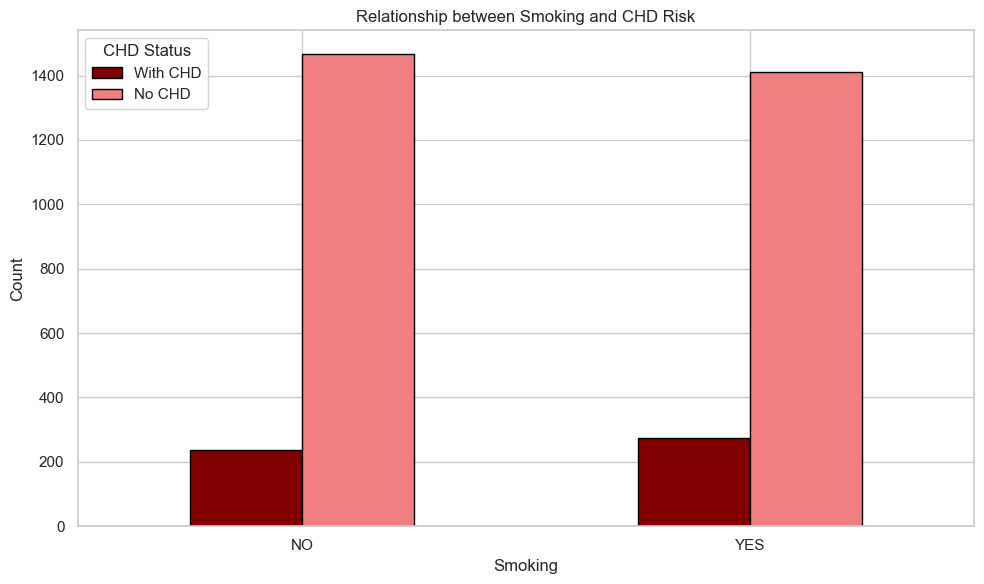

In [32]:
# Plotting the relationship between is_smoking and CHD risk
chd_vs_smoking_df.plot(kind='bar', figsize=(10, 6), color=['Maroon', 'lightcoral'], edgecolor='black')

# Set plot title and labels
plt.title('Relationship between Smoking and CHD Risk')
plt.xlabel('Smoking')
plt.ylabel('Count')

plt.legend(title='CHD Status')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

- Among individuals who do not smoke (NO), there are 236 cases of CHD and 1467 cases without CHD.
- Among individuals who smoke (YES), there are 275 cases of CHD and 1412 cases without CHD.
- It appears that there are slightly more cases of CHD among individuals who smoke (YES) compared to those who do not smoke (NO). 

### Age and is_smoking 

In [33]:
# Count of individuals by age and smoking status
age_smoking_counts = df.groupby(['age', 'is_smoking']).size().unstack(fill_value=0)
age_smoking_counts

is_smoking,NO,YES
age,,
32,0,1
33,2,2
34,7,9
35,10,19
36,36,39
37,24,49
38,47,72
39,55,84
40,54,94


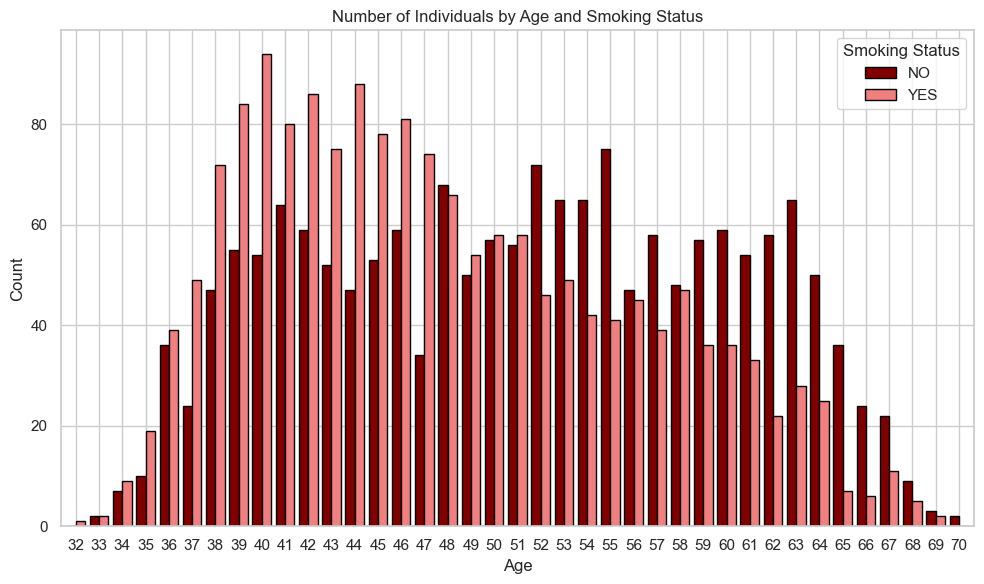

In [34]:
age_smoking_counts.plot(kind='bar', figsize=(10, 6), width=0.8, color=['Maroon', 'lightcoral'], edgecolor='black')

# Set plot title and labels
plt.title('Number of Individuals by Age and Smoking Status')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Smoking Status')

# Show plot
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

- In some age groups, such as 34 to 47, the number of individuals who smoke is relatively close to or slightly higher than the number of non-smokers.
- Smoking prevalence is higher in younger and middle-aged groups and decreases as individuals grow older.

### Age, is_smoking and TenYearCHD

In [35]:
# Count of individuals without CHD for each age group, is_smoking, and TenYearCHD
no_chd_counts_by_age_sex = df[(df['TenYearCHD'] == 0)].groupby(['age', 'is_smoking'])['TenYearCHD'].count().unstack(fill_value=0)

# Count of individuals with CHD for each age group, is_smoking, and TenYearCHD
chd_counts_by_age_sex = df[(df['TenYearCHD'] == 1)].groupby(['age', 'is_smoking'])['TenYearCHD'].count().unstack(fill_value=0)

# Concatenate the dataframes along the columns axis
chd_vs_age_sex_df = pd.concat([no_chd_counts_by_age_sex, chd_counts_by_age_sex], axis=1, keys=['No CHD', 'With CHD'])
chd_vs_age_sex_df

No CHD     With CHD      
is_smoking     NO YES       NO   YES
age                                 
32              0   1      NaN   NaN
33              2   2      NaN   NaN
34              7   9      NaN   NaN
35             10  17      0.0   2.0
36             36  36      0.0   3.0
37             24  47      0.0   2.0
38             45  67      2.0   5.0
39             54  80      1.0   4.0
40             51  86      3.0   8.0
41             64  69      0.0  11.0
42             54  77      5.0   9.0
43             48  70      4.0   5.0
44             43  77      4.0  11.0
45             50  71      3.0   7.0
46             57  72      2.0   9.0
47             29  61      5.0  13.0
48             63  55      5.0  11.0
49             44  41      6.0  13.0
50             48  51      9.0   7.0
51             49  42      7.0  16.0
52             59  34     13.0  12.0
53             54  41     11.0   8.0
54             61  32      4.0  10.0
55             65  33     10.0   8.0
56             40  32      7.0  13.0
57             48  27     10.0  12.0
58             38  34     10.0  13.0
59             46  28     11.0   8.0
60             45  26     14.0  10.0
61             40  26     14.0   7.0
62             46  14     12.0   8.0
63             48  17     17.0  11.0
64             40  19     10.0   6.0
65             23   4     13.0   3.0
66             12   4     12.0   2.0
67             15   7      7.0   4.0
68              5   2      4.0   3.0
69              3   1      0.0   1.0
70              1   0      1.0   0.0

- At age 35, there are 10 individuals who do not smoke (NO) and have no CHD, and 17 individuals who smoke (YES) and have no CHD. 
- At age 45, there are 3 individuals who do not smoke (NO) and have CHD, and 7 individuals who smoke (YES) and have CHD. 
- At both ages 35 and 45, there is a higher count of individuals who smoke (YES) and have no CHD compared to those who do not smoke (NO) and have no CHD. This indicates a potential association between smoking and a lower risk of CHD at these ages.
- At age 45, there is a noticeable increase in the count of individuals who smoke (YES) and have CHD compared to age 35. This suggests that as individuals age, the risk of CHD may increase, especially among smokers.

## cigsPerDay

In [36]:
# Calculate counts of cigsPerDay and sort them
cigsPerDay_counts = df['cigsPerDay'].value_counts().sort_index()
cigsPerDay_counts

0.0     1725
1.0       48
2.0       17
3.0       79
4.0        7
5.0      103
6.0       14
7.0        8
8.0       10
9.0      104
10.0     106
11.0       4
12.0       3
13.0       3
14.0       1
15.0     172
16.0       2
17.0       5
18.0       7
19.0       2
20.0     606
23.0       5
25.0      44
30.0     176
35.0      17
38.0       1
40.0      62
43.0      42
45.0       2
50.0       6
60.0       8
70.0       1
Name: cigsPerDay, dtype: int64

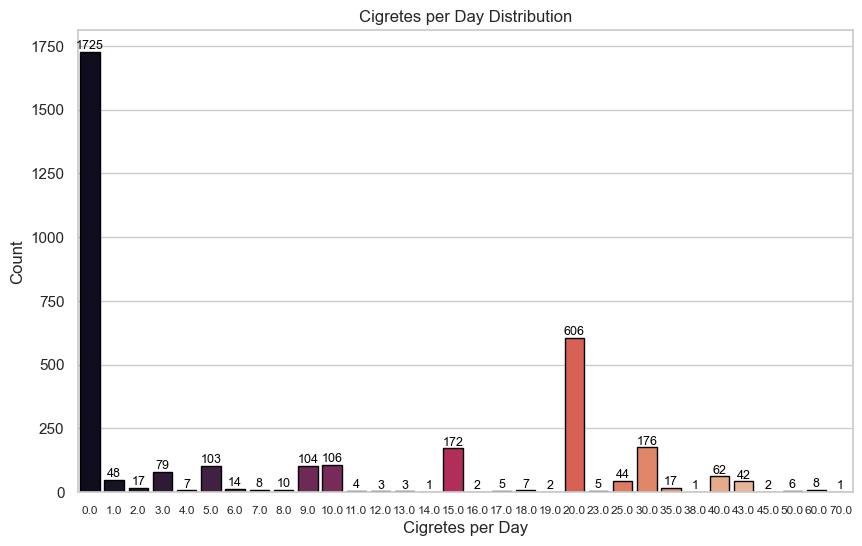

In [37]:
# Set figure size
plt.figure(figsize=(10, 6))

# Create bar plot
sns.barplot(x=cigsPerDay_counts.index, y=cigsPerDay_counts,  palette='rocket', edgecolor='black')

# Adding annotations to the bars
for index, value in enumerate(cigsPerDay_counts):
    plt.text(index, value, str(value), ha='center', va='bottom', color='black', fontsize=9)

# Set plot title and labels
plt.title('Cigretes per Day Distribution')
plt.xlabel('Cigretes per Day')
plt.ylabel('Count')

# the font size of x-axis tick labels
plt.xticks(fontsize=8.5)


plt.show()

- The most common category is individuals who do not smoke at all, with 1725 individuals falling into this group.
- There is a smaller group of individuals who smoke low to moderate numbers of cigarettes per day, such as 1 to 15 cigarettes.
- There are relatively fewer individuals who smoke heavily, with only a small number of individuals smoking more than 20 cigarettes per day.
- The distribution of cigarette consumption per day is heterogeneous, with peaks at certain values and sparse data points at others.

### cigsPerDay with TenYearCHD

In [38]:
# Count of individuals by cigsPerDay and TenYearCHD
chd_vs_cigsPerDay_df = df.groupby(['cigsPerDay', 'TenYearCHD']).size().unstack(fill_value=0)

# Rename columns
chd_vs_cigsPerDay_df = chd_vs_cigsPerDay_df.rename(columns={0: 'No CHD', 1: 'With CHD'})
chd_vs_cigsPerDay_df

TenYearCHD,No CHD,With CHD
cigsPerDay,,
0.0,1488,237
1.0,41,7
2.0,14,3
3.0,70,9
4.0,7,0
5.0,91,12
6.0,11,3
7.0,5,3
8.0,10,0


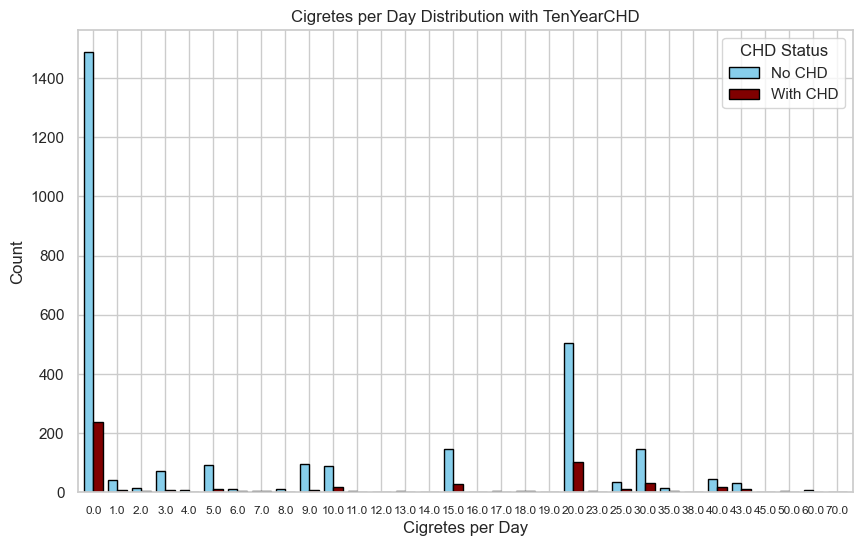

In [39]:
chd_vs_cigsPerDay_df.plot(kind='bar', figsize=(10, 6), width=0.8, color=['skyblue', 'maroon'], edgecolor='black')  # Adjust width as desired

# Set plot title and labels
plt.title('Cigretes per Day Distribution with TenYearCHD')
plt.xlabel('Cigretes per Day')
plt.ylabel('Count')
plt.legend(title='CHD Status')
plt.xticks(rotation=0,fontsize=8.5)
plt.show()

- Among individuals who smoke 20 cigarettes per day, there are 103 cases of CHD compared to 503 cases without CHD.
- Means, individuals who smoke more cigarettes per day are more likely to have CHD compared to those who smoke fewer or no cigarettes per day.
- Among individuals who smoke 1 cigarette per day, there are 7 cases of CHD compared to 41 cases without CHD.
- Means, Even at lower levels of cigarette consumption, there are cases of CHD.
- Fewer individuals who smoke very high numbers of cigarettes per day, making it hard to draw clear conclusions about CHD risk at these extreme levels of cigarette consumption.

## BPMeds

In [40]:
# Count the occurrences of each category in the 'BPMeds' column
BPMeds_counts = df['BPMeds'].value_counts()
BPMeds_counts

0.0    3290
1.0     100
Name: BPMeds, dtype: int64

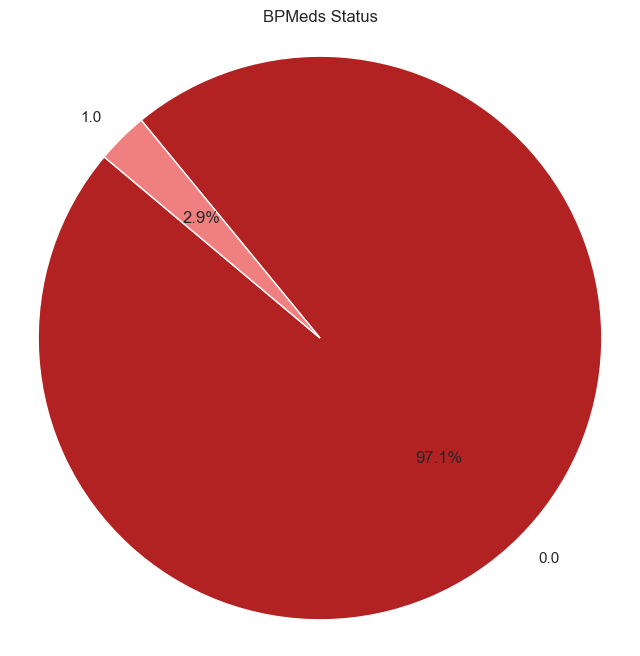

In [41]:
# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(BPMeds_counts, labels=BPMeds_counts.index, autopct='%1.1f%%', startangle=140, colors=['FireBrick', 'lightcoral'])

# Set plot title
plt.title('BPMeds Status')

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Show plot
plt.show()

- The majority of individuals in the dataset (97.1%) are not taking blood pressure medication (BPMeds), while a small percentage (2.9%) are taking BPMeds.

### BPMed with TenYearCHD

In [42]:
# Count of individuals with CHD with BPMed
chd_counts_by_BPMeds = df[df['TenYearCHD'] == 1]['BPMeds'].value_counts()

# Count of individuals without CHD for BPMed
no_chd_counts_by_BPMeds = df[df['TenYearCHD'] == 0]['BPMeds'].value_counts()

# Combine the counts into a DataFrame
chd_vs_BPMeds_df = pd.DataFrame({'With CHD': chd_counts_by_BPMeds, 'No CHD': no_chd_counts_by_BPMeds})
chd_vs_BPMeds_df

,With CHD,No CHD
0.0,478,2812
1.0,33,67


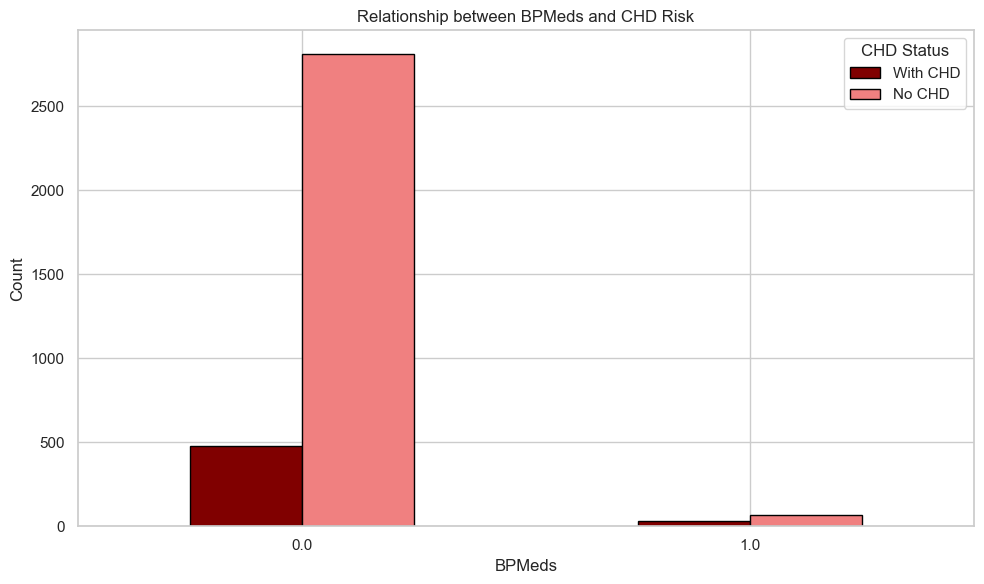

In [43]:
# Plotting the relationship between BPMed and CHD risk
chd_vs_BPMeds_df.plot(kind='bar', figsize=(10, 6), color=['Maroon', 'lightcoral'], edgecolor='black')

# Set plot title and labels
plt.title('Relationship between BPMeds and CHD Risk')
plt.xlabel('BPMeds')
plt.ylabel('Count')

plt.legend(title='CHD Status')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

- Most people with CHD (478 out of 511) are not using blood pressure medication. Only a small portion (33 out of 511) are taking such medication. 
- Similarly, among those without CHD, the majority (2812 out of 2879) are not on blood pressure medication, while a smaller number (67 out of 2879) are. 
- So we can sat that a significant proportion of individuals, whether they have CHD or not, are not using blood pressure medication.

## prevalentStroke

In [44]:
# Count the occurrences of each category in the 'prevalentStroke' column
prevalentStroke_counts = df['prevalentStroke'].value_counts()
prevalentStroke_counts

0    3368
1      22
Name: prevalentStroke, dtype: int64

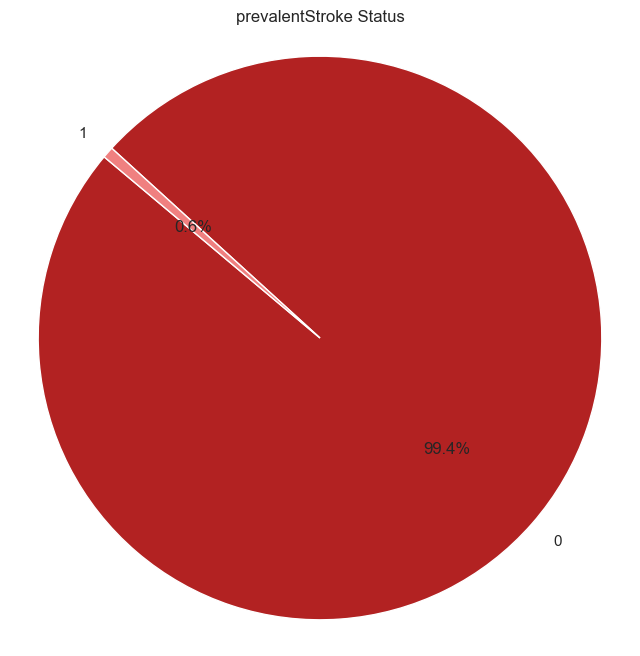

In [45]:
# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(prevalentStroke_counts, labels=prevalentStroke_counts.index, autopct='%1.1f%%', startangle=140, colors=['FireBrick', 'lightcoral'])

# Set plot title
plt.title('prevalentStroke Status')

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Show plot
plt.show()

- majority of individuals in the dataset (3368 out of 3390) have not experienced a prevalent stroke (0).
- A very small proportion of individuals (22 out of 3390) have experienced a prevalent stroke (1), representing only 0.6% of the dataset. 
- This suggests that prevalent stroke is a relatively rare occurrence in this population.

### prevalentStroke with TenYearCHD

In [46]:
# Count of individuals with CHD for prevalentStroke 
chd_counts_by_stroke = df[df['TenYearCHD'] == 1]['prevalentStroke'].value_counts()

# Count of individuals without CHD for prevalentStroke
no_chd_counts_by_stroke = df[df['TenYearCHD'] == 0]['prevalentStroke'].value_counts()

# Combine the counts into a DataFrame
chd_vs_stroke_df = pd.DataFrame({'With CHD': chd_counts_by_stroke, 'No CHD': no_chd_counts_by_stroke})
chd_vs_stroke_df

,With CHD,No CHD
0,501,2867
1,10,12


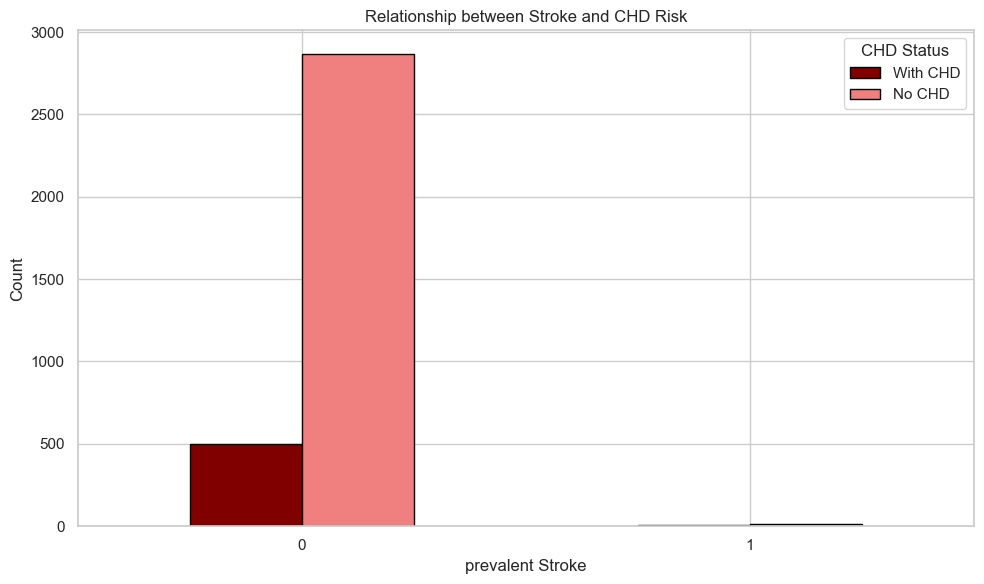

In [47]:
# Plotting the relationship between prevalentStroke and CHD risk
chd_vs_stroke_df.plot(kind='bar', figsize=(10, 6), color=['Maroon', 'lightcoral'], edgecolor='black')

# Set plot title and labels
plt.title('Relationship between Stroke and CHD Risk')
plt.xlabel('prevalent Stroke')
plt.ylabel('Count')

plt.legend(title='CHD Status')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

- Among individuals with CHD, 501 individuals have not experienced a prevalent stroke (0), while only 10 individuals have (1). 
- Among individuals without CHD, 2867 have not experienced a prevalent stroke (0), while only 12 have (1).

### 7) prevalentHyp

In [48]:
# Count the occurrences of each category in the 'prevalentHyp' column
prevalentHyp_counts = df['prevalentHyp'].value_counts()
prevalentHyp_counts

0    2321
1    1069
Name: prevalentHyp, dtype: int64

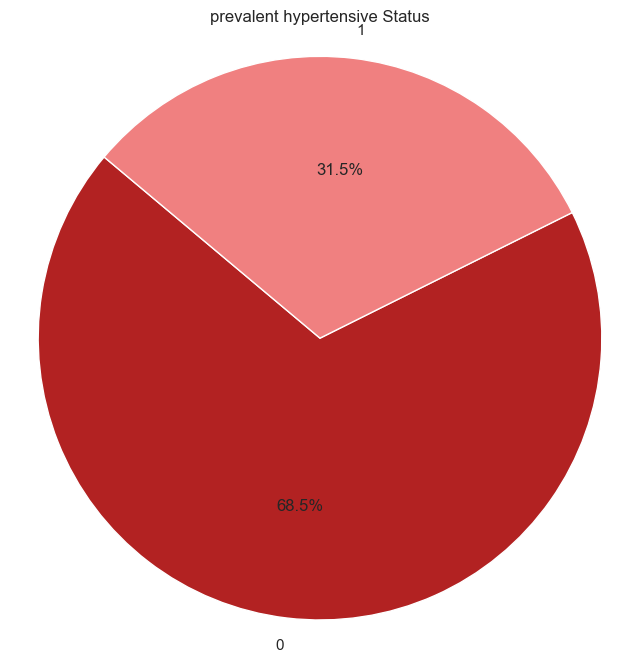

In [49]:
# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(prevalentHyp_counts, labels=prevalentHyp_counts.index, autopct='%1.1f%%', startangle=140, colors=['FireBrick', 'lightcoral'])

# Set plot title
plt.title('prevalent hypertensive Status')

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Show plot
plt.show()

- Most people in the dataset, specifically 2321 out of 3390 individuals, don't have prevalent hypertension, comprising approximately 68.5% of the dataset
- However, about 31.5% of individuals, 1069 out of 3390 individuals, do have prevalent hypertension.

In [50]:
# Count of individuals with CHD for prevalentHyp 
chd_counts_by_hypertensive = df[df['TenYearCHD'] == 1]['prevalentHyp'].value_counts()

# Count of individuals without CHD for prevalentHyp
no_chd_counts_by_hypertensive = df[df['TenYearCHD'] == 0]['prevalentHyp'].value_counts()

# Combine the counts into a DataFrame
chd_vs_hypertensive_df = pd.DataFrame({'With CHD': chd_counts_by_hypertensive, 'No CHD': no_chd_counts_by_hypertensive})
chd_vs_hypertensive_df

,With CHD,No CHD
0,256,2065
1,255,814


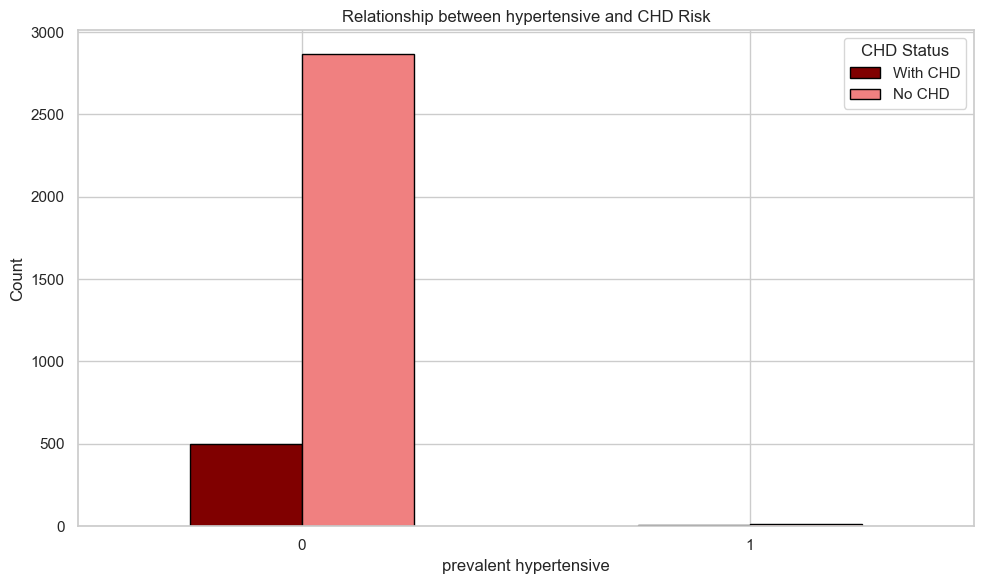

In [51]:
# Plotting the relationship between prevalentHyp and CHD risk
chd_vs_stroke_df.plot(kind='bar', figsize=(10, 6), color=['Maroon', 'lightcoral'], edgecolor='black')

# Set plot title and labels
plt.title('Relationship between hypertensive and CHD Risk')
plt.xlabel('prevalent hypertensive')
plt.ylabel('Count')

plt.legend(title='CHD Status')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

- Among individuals with CHD, there are slightly more people who have prevalent hypertension compared to those who don't.
- Among individuals without CHD, there are slightly more people who don't have prevalent hypertension compared to those who do. 
- Overall, there's a relatively equal distribution of CHD among both hypertensive and non-hypertensive individuals

## diabetes

In [52]:
# Count the occurrences of each category in the 'diabetes' column
diabetes_counts = df['diabetes'].value_counts()
diabetes_counts

0    3303
1      87
Name: diabetes, dtype: int64

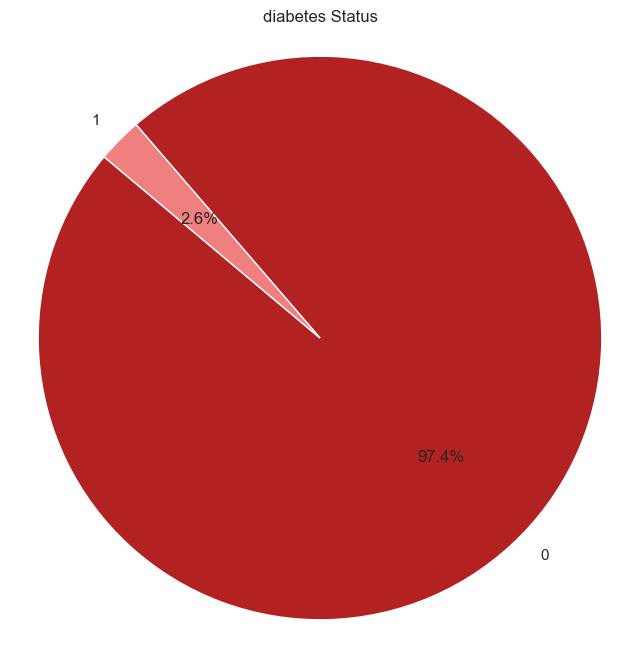

In [53]:
# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(diabetes_counts, labels=diabetes_counts.index, autopct='%1.1f%%', startangle=140, colors=['FireBrick', 'lightcoral'])

# Set plot title
plt.title('diabetes Status')

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Show plot
plt.show()

- The majority of individuals in the dataset (3303 out of 3390) do not have diabetes, comprising approximately 97.4% of the population. 
- A small proportion of individuals (87 out of 3390) have diabetes, representing approximately 2.6% of the dataset.
- So we can say that most people in the dataset do not have diabetes, while a small percentage do.

In [54]:
# Count of individuals with CHD with diabetes 
chd_counts_by_diabetes = df[df['TenYearCHD'] == 1]['diabetes'].value_counts()

# Count of individuals without CHD for diabetes
no_chd_counts_by_diabetes = df[df['TenYearCHD'] == 0]['diabetes'].value_counts()

# Combine the counts into a DataFrame
chd_vs_diabetes_df = pd.DataFrame({'With CHD': chd_counts_by_diabetes, 'No CHD': no_chd_counts_by_diabetes})
chd_vs_diabetes_df

,With CHD,No CHD
0,478,2825
1,33,54


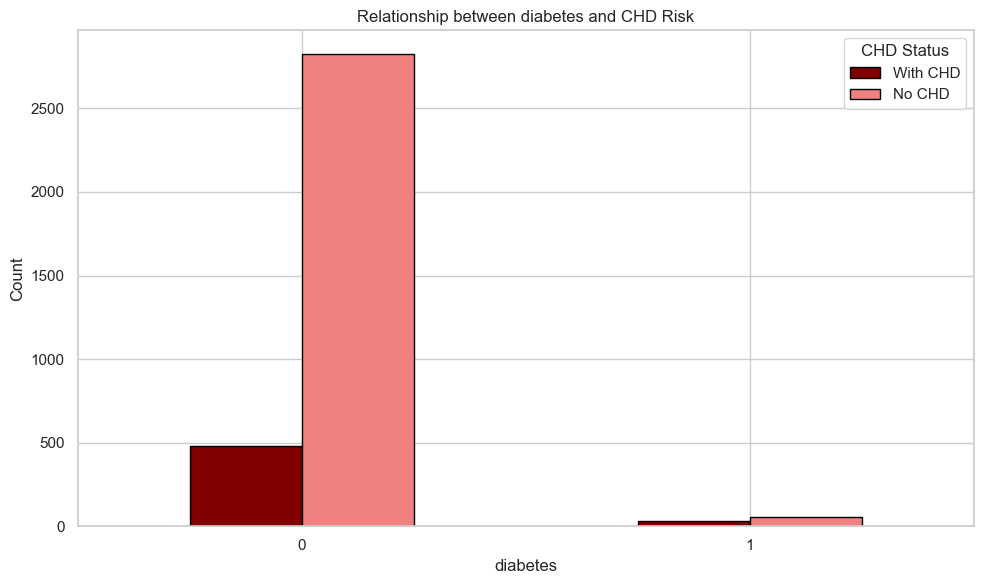

In [55]:
# Plotting the relationship between diabetes and CHD risk
chd_vs_diabetes_df.plot(kind='bar', figsize=(10, 6), color=['Maroon', 'lightcoral'], edgecolor='black')

# Set plot title and labels
plt.title('Relationship between diabetes and CHD Risk')
plt.xlabel('diabetes')
plt.ylabel('Count')

plt.legend(title='CHD Status')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

- Among individuals with CHD, a majority do not have diabetes (478 out of 511), while a smaller proportion do (33 out of 511).
- Among individuals without CHD, most do not have diabetes (2825 out of 2879), and only a small portion do (54 out of 2879).
- So we can say that there seems to be a higher prevalence of CHD among individuals without diabetes compared to those with diabetes.

## totChol

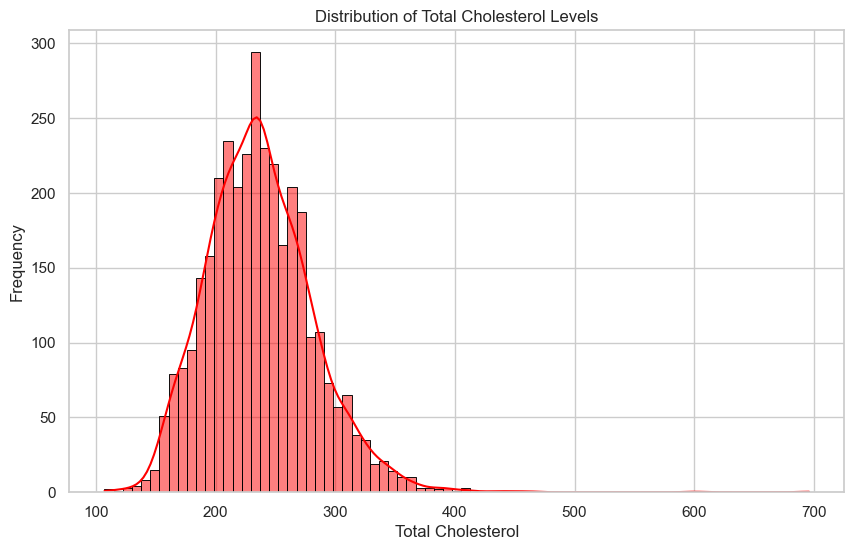

In [56]:
# Set figure size
plt.figure(figsize=(10, 6))

# Plot histogram with KDE
sns.histplot(data=df, x='totChol', kde=True, color='red', edgecolor='black')

# Set plot title and labels
plt.title('Distribution of Total Cholesterol Levels')
plt.xlabel('Total Cholesterol')
plt.ylabel('Frequency')

# Show plot
plt.show()

- we can observe that there are various cholesterol levels present in the dataset, ranging from 77 to 696.
- The distribution appears to be positively skewed, meaning that it is skewed towards the lower end of total cholesterol levels. 
- The majority of individuals have lower total cholesterol levels., as seen by the peak on the left side.
- However, there are some individuals with higher cholesterol levels, though they are less common.

### totChol and TenYearCHD

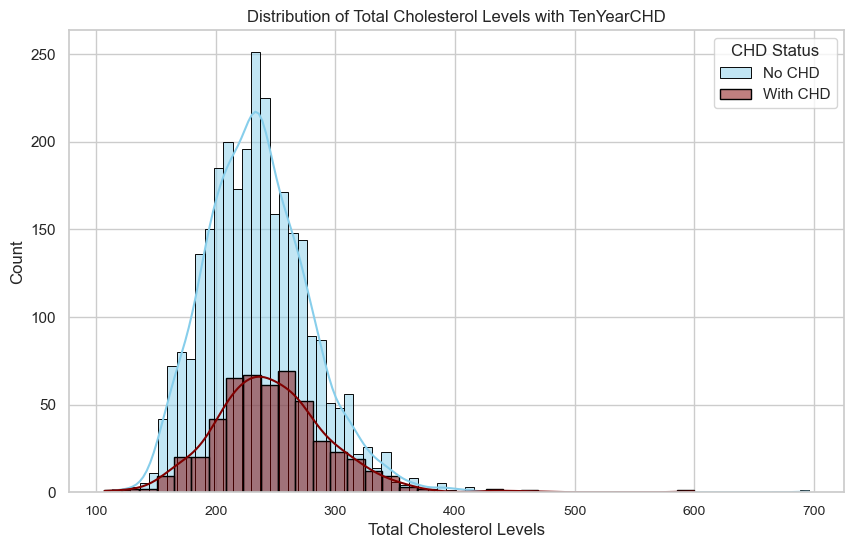

In [57]:
# Set figure size
plt.figure(figsize=(10, 6))

# Plot histogram with KDE for CHD status 0 (No CHD)
sns.histplot(data=df[df['TenYearCHD'] == 0], x='totChol', kde=True, color='skyblue', label='No CHD', edgecolor='black')

# Plot histogram with KDE for CHD status 1 (With CHD)
sns.histplot(data=df[df['TenYearCHD'] == 1], x='totChol', kde=True, color='maroon', label='With CHD', edgecolor='black')

# Set plot title and labels
plt.title('Distribution of Total Cholesterol Levels with TenYearCHD')
plt.xlabel('Total Cholesterol Levels')
plt.ylabel('Count')
plt.legend(title='CHD Status')
plt.xticks(rotation=0, fontsize=10)

# Show plot
plt.show()

- For individuals without CHD (No CHD), the distribution of total cholesterol levels appears to have a peak around certain values, with a gradual decline in frequency as cholesterol levels increase.
- For individuals with CHD, their cholesterol levels vary more widely compared to those without CHD. There isn't a clear peak in the distribution.

## sysBP and diaBP	

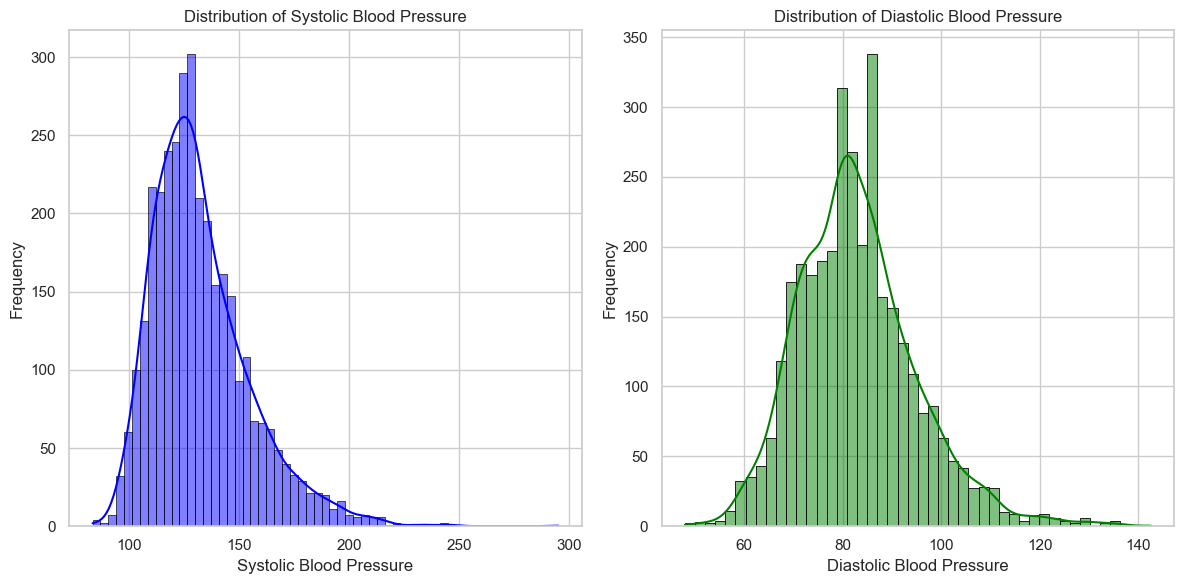

In [58]:
# Set figure size and create subplots
plt.figure(figsize=(12, 6))

# Plot for systolic blood pressure (sysBP)
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
sns.histplot(data=df, x='sysBP', kde=True, color='blue', edgecolor='black')
plt.title('Distribution of Systolic Blood Pressure')
plt.xlabel('Systolic Blood Pressure')
plt.ylabel('Frequency')

# Plot for diastolic blood pressure (diaBP)
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
sns.histplot(data=df, x='diaBP', kde=True, color='green', edgecolor='black')
plt.title('Distribution of Diastolic Blood Pressure')
plt.xlabel('Diastolic Blood Pressure')
plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()

- Both systolic and diastolic blood pressure distributions display peaks around specific ranges, with KDE curves indicating smooth distributions and some variability around the peaks.

### sysBP and diaBP with TenYearCHD

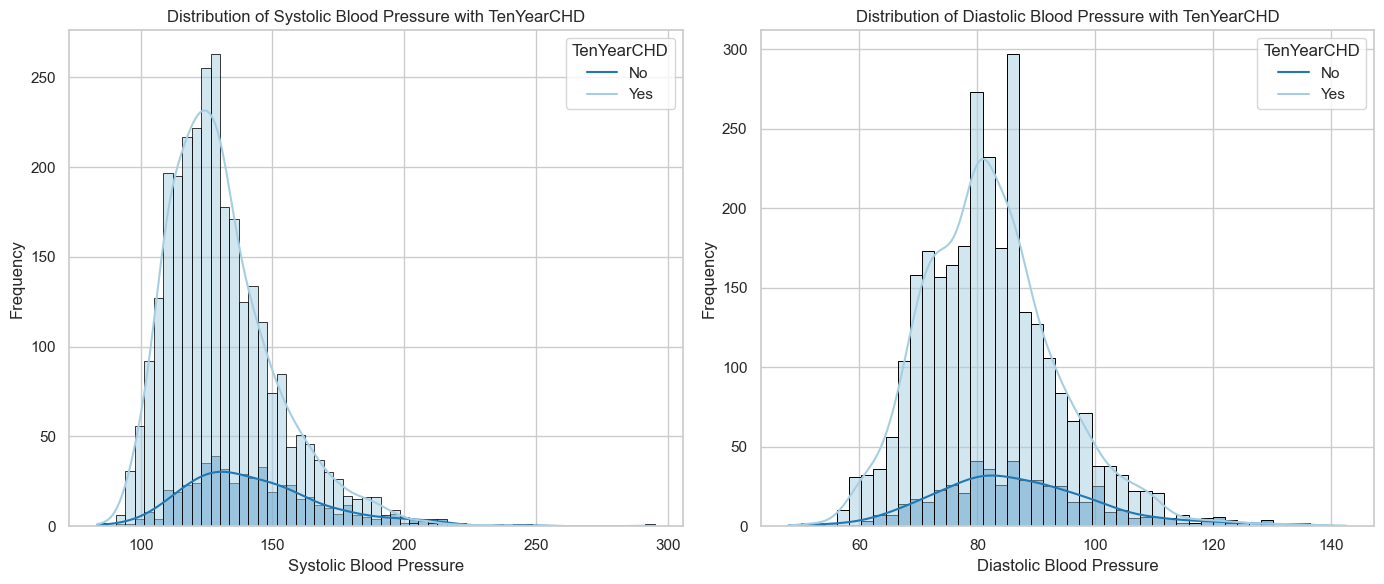

In [59]:
# Set up the subplots
plt.figure(figsize=(14, 6))

# Plot for sysBP
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='sysBP', hue='TenYearCHD', kde=True, palette='Paired', edgecolor='black')
plt.title('Distribution of Systolic Blood Pressure with TenYearCHD')
plt.xlabel('Systolic Blood Pressure')
plt.ylabel('Frequency')
plt.legend(title='TenYearCHD', labels=['No', 'Yes'])

# Plot for diaBP
plt.subplot(1, 2, 2)
sns.histplot(data=df, x='diaBP', hue='TenYearCHD', kde=True, palette='Paired', edgecolor='black')
plt.title('Distribution of Diastolic Blood Pressure with TenYearCHD')
plt.xlabel('Diastolic Blood Pressure')
plt.ylabel('Frequency')
plt.legend(title='TenYearCHD', labels=['No', 'Yes'])

# Show plots
plt.tight_layout()
plt.show()

- For both systolic and diastolic blood pressure, individuals predicted to have TenYearCHD ("Yes") tend to have higher blood pressure levels compared to those predicted as "No
- The difference in blood pressure distribution between the two groups suggests that blood pressure may be important in predicting coronary heart disease over ten years.

## BMI

In [60]:
df['BMI'].value_counts()

25.38    24
22.91    17
22.54    16
22.19    15
23.48    12
         ..
39.04     1
26.66     1
29.55     1
35.58     1
31.09     1
Name: BMI, Length: 1259, dtype: int64

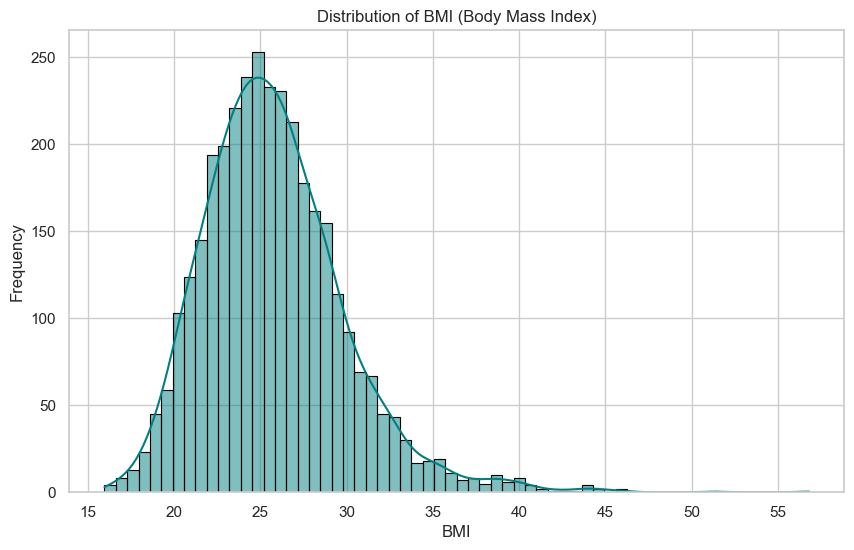

In [61]:
# Set figure size
plt.figure(figsize=(10, 6))

# Plot histogram
sns.histplot(data=df, x='BMI', kde=True, color='teal', edgecolor='black')

# Set plot title and labels
plt.title('Distribution of BMI (Body Mass Index)')
plt.xlabel('BMI')
plt.ylabel('Frequency')

# Show plot
plt.show()

- The most common BMI value is 25.38, with a frequency of 24 occurrences.
- There are various other BMI values present, each with their own frequency of occurrences.

### BMI with TenYearCHD

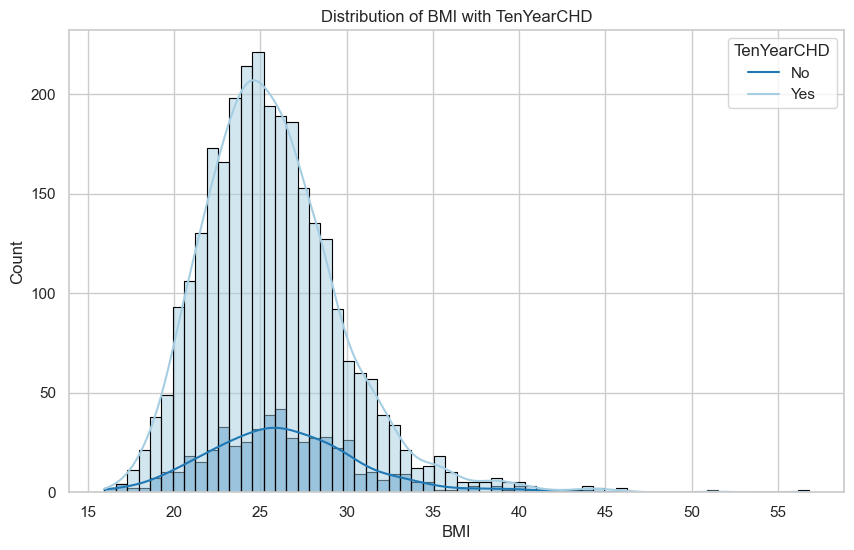

In [62]:
# Set up the figure and axes
plt.figure(figsize=(10, 6))

# Plot the data using seaborn
sns.histplot(data=df, x='BMI', hue='TenYearCHD', kde=True, palette='Paired', edgecolor='black')

# Add title and labels
plt.title('Distribution of BMI with TenYearCHD')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.legend(title='TenYearCHD', labels=['No', 'Yes'])

# Show the plot
plt.show()

## heartRate

In [63]:
# Count occurrences of each heart rate value
heartRate_counts = df['heartRate'].value_counts()
heartRate_counts

75.0     443
80.0     298
70.0     241
85.0     191
72.0     184
        ... 
47.0       1
143.0      1
51.0       1
140.0      1
97.0       1
Name: heartRate, Length: 68, dtype: int64

In [64]:
# Sort the heart rate values in ascending order
heartRate_counts = heartRate_counts.sort_index()
heartRate_counts

45.0      1
47.0      1
48.0      4
50.0     15
51.0      1
         ..
120.0     5
122.0     2
125.0     3
140.0     1
143.0     1
Name: heartRate, Length: 68, dtype: int64

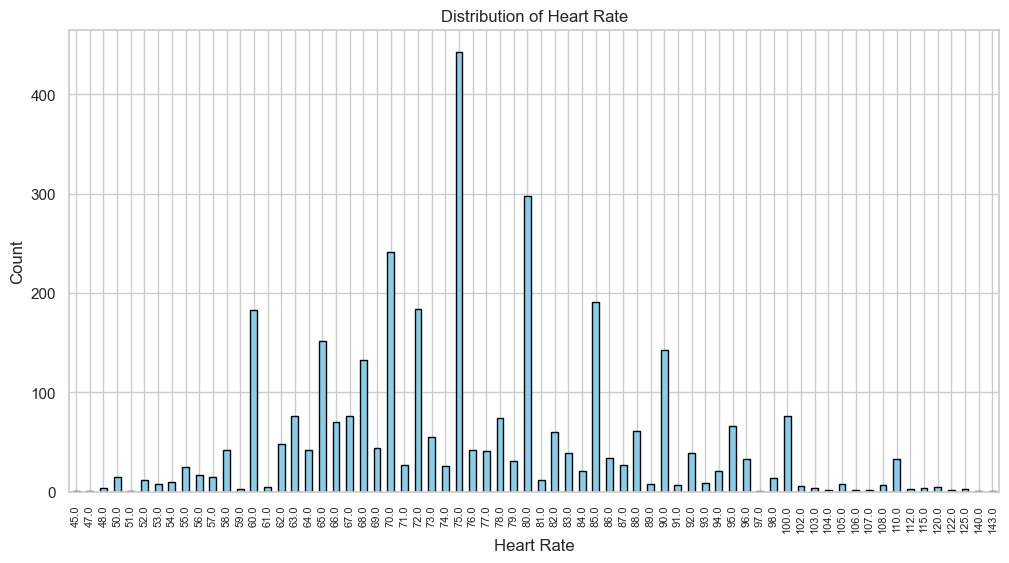

In [65]:
# Set figure size
plt.figure(figsize=(12, 6))

# Plot bar graph
heartRate_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Set plot title and labels
plt.title('Distribution of Heart Rate')
plt.xlabel('Heart Rate')
plt.ylabel('Count')
plt.xticks(rotation=90, fontsize=8)

# Show plot
plt.show()

- The majority of people have heart rates clustered around specific values like 75, 80, and 70 beats per minute (bpm).  

### heartRate with TenYearCHD

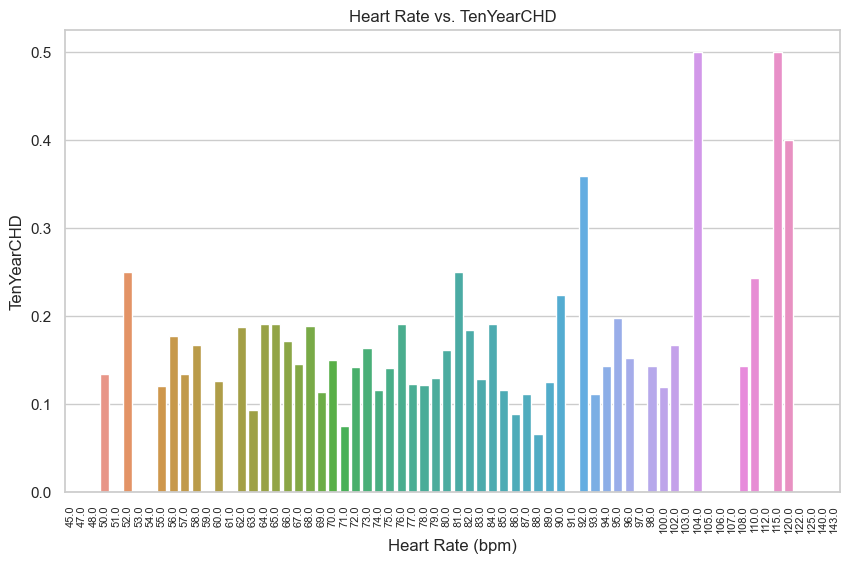

In [66]:
# Set figure size
plt.figure(figsize=(10, 6))

# Plot bar graph
sns.barplot(x='heartRate', y='TenYearCHD', data=df, ci=None)

# Set plot title and labels
plt.title('Heart Rate vs. TenYearCHD')
plt.xlabel('Heart Rate (bpm)')
plt.ylabel('TenYearCHD')
plt.xticks(rotation=90, fontsize=8)

# Show plot
plt.show()

- The graph depicts the relationship between heart rate (in beats per minute, bpm) and the likelihood of developing coronary heart disease (TenYearCHD). Each bar represents the average TenYearCHD value (0 or 1) corresponding to a specific heart rate value.
- There doesn't appear to be a clear pattern or trend indicating a strong relationship between heart rate and the likelihood of TenYearCHD.

## glucose

In [67]:
# Count occurrences of each heart rate value
glucose_counts = df['glucose'].value_counts()
glucose_counts

78.0     421
75.0     149
83.0     135
70.0     123
77.0     122
        ... 
191.0      1
119.0      1
43.0       1
256.0      1
274.0      1
Name: glucose, Length: 132, dtype: int64

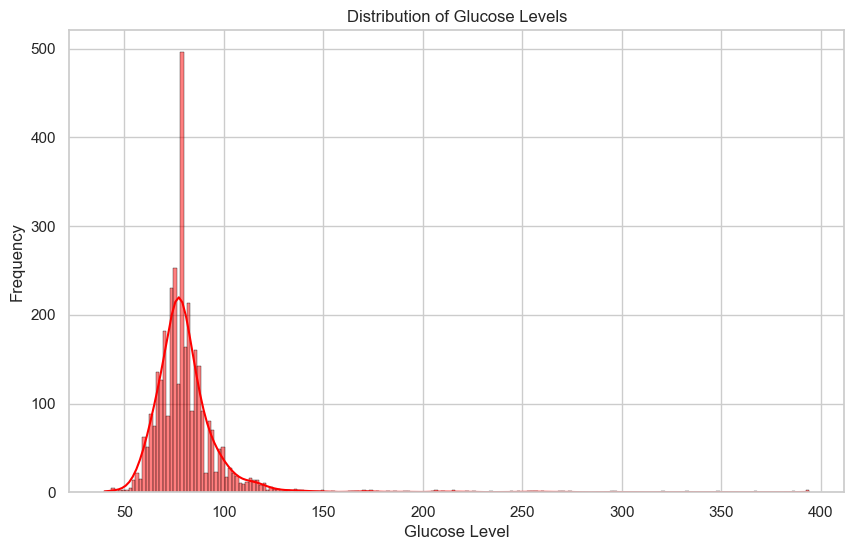

In [68]:
# Set figure size
plt.figure(figsize=(10, 6))

# Plot histogram
sns.histplot(data=df, x='glucose', kde=True, color='red', edgecolor='black')

# Set plot title and labels
plt.title('Distribution of Glucose Levels')
plt.xlabel('Glucose Level')
plt.ylabel('Frequency')

# Show plot
plt.show()

- Glucose levels range from 40 to 394, with varying counts for each level. 
- The glucose level 78.0 appears most frequently with a count of 421. 
- Some glucose levels, such as 191.0 or 119.0, have only one occurrence.

### glucose with TenYearCHD

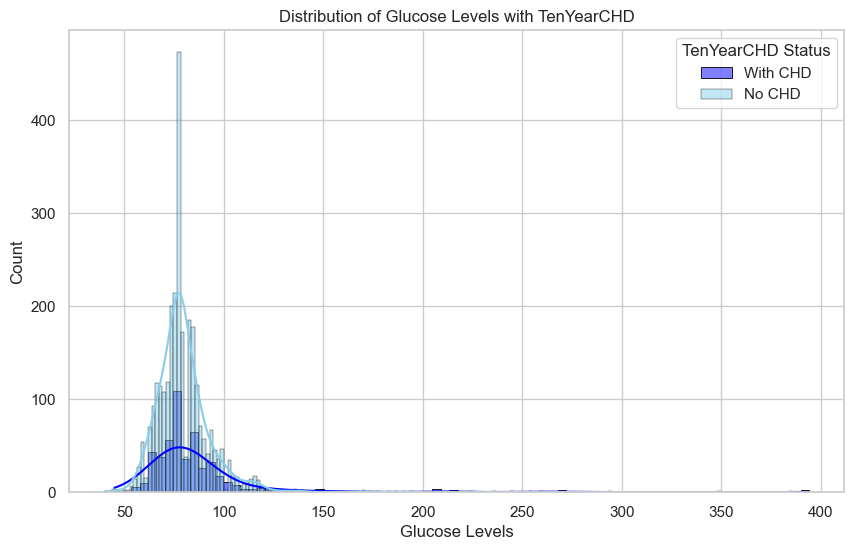

In [69]:
# Set figure size
plt.figure(figsize=(10, 6))

# Plot histogram with KDE for individuals with TenYearCHD = 1
sns.histplot(data=df[df['TenYearCHD'] == 1], x='glucose', kde=True, color='blue', label='With CHD', edgecolor='black')

# Plot histogram with KDE for individuals with TenYearCHD = 0
sns.histplot(data=df[df['TenYearCHD'] == 0], x='glucose', kde=True, color='skyblue', label='No CHD', edgecolor='black')

# Set plot title and labels
plt.title('Distribution of Glucose Levels with TenYearCHD')
plt.xlabel('Glucose Levels')
plt.ylabel('Count')
plt.legend(title='TenYearCHD Status')

# Show plot
plt.show()

- The most common glucose level among individuals with CHD is 78.0, with 53 occurrences.
- The most common glucose level among individuals without CHD is 78.0, with 368 occurrences.

# Data Preprocessing & Feature Engineering

## Encode categorical variables

In [70]:
from sklearn.preprocessing import LabelEncoder

# Instantiate LabelEncoder
le = LabelEncoder()

# Fit and transform 'Income' column
df['sex'] = le.fit_transform(df['sex'])
df['is_smoking'] = le.fit_transform(df['is_smoking'])

In [71]:
df.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,2.0,0,1,3.0,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1
1,36,4.0,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,1,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,0,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [72]:
df.shape

(3390, 16)

## Correlation using Heatmap

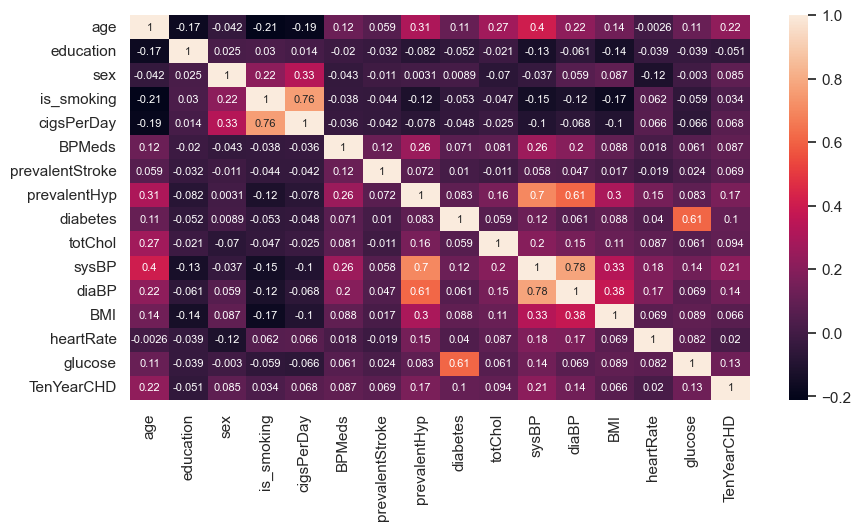

In [73]:
# Calculate correlation matrix
corr = df.corr()

# Plot heatmap with smaller font size
plt.figure(figsize=(10, 5))
sns.heatmap(corr, annot=True, cmap='rocket', annot_kws={"size": 8})
plt.show()

- There are moderate positive correlations between TenYearCHD and other cardiovascular risk factors such as age (0.22), prevalentHyp (0.17), sysBP (0.21), and diaBP (0.14), indicating that individuals with higher blood pressure levels are more likely to develop TenYearCHD.
- Glucose levels (glucose) also show a positive correlation with TenYearCHD (0.13), suggesting that higher glucose levels may be associated with a higher risk of developing coronary heart disease over ten years.
- Also we can say that positive values indicate a positive correlation, meaning as one variable increases, the other tends to increase as well, while negative values indicate an inverse relationship.
- **Systolic blood pressure (sysBP) and diastolic blood pressure (diaBP) exhibit a strong positive correlation of 0.78.**

### Handling Multicollinearity:

In [74]:
# Range of systolic bp and diastolic bp

print(df['sysBP'].min(),df['sysBP'].max())
print(df['diaBP'].min(),df['diaBP'].max())

83.5 295.0
48.0 142.5


- **To handle multicollinearity between these two independent continuous variables, we can replace these two columns with a new variable 'pulse pressure', which is given as follows:**

**Pulse Pressure = Systolic BP - Diastolic BP**

In [75]:
# Creating a new column pulse_pressure
# and dropping systolic_bp and diastolic_bp

df['pulse_pressure'] = df['sysBP']-df['diaBP']
df.drop('sysBP',axis=1,inplace=True)
df.drop('diaBP',axis=1,inplace=True)

In [76]:
df.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,BMI,heartRate,glucose,TenYearCHD,pulse_pressure
0,64,2.0,0,1,3.0,0.0,0,0,0,221.0,25.38,90.0,80.0,1,63.0
1,36,4.0,1,0,0.0,0.0,0,1,0,212.0,29.77,72.0,75.0,0,70.0
2,46,1.0,0,1,10.0,0.0,0,0,0,250.0,20.35,88.0,94.0,0,45.0
3,50,1.0,1,1,20.0,0.0,0,1,0,233.0,28.26,68.0,94.0,1,70.0
4,64,1.0,0,1,30.0,0.0,0,0,0,241.0,26.42,70.0,77.0,0,51.5


Text(0.5, 1.0, 'Pulse Pressure Distribution')

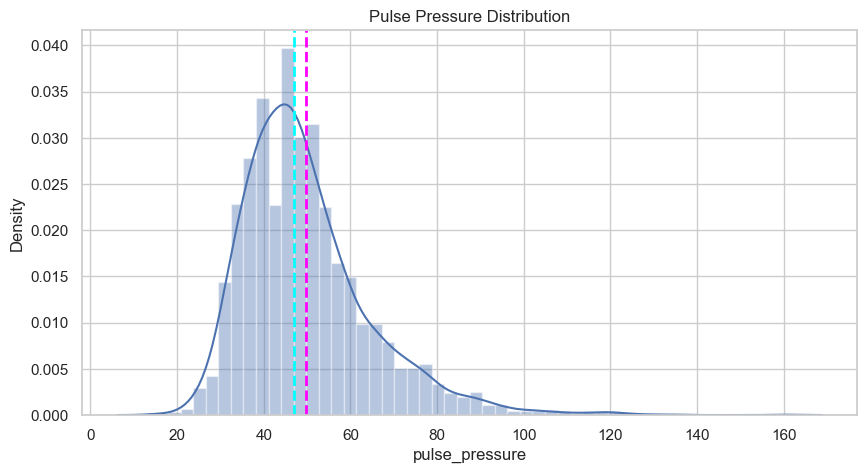

In [77]:
# Analyzing the distribution of pulse_pressure
plt.figure(figsize=(10,5))
sns.distplot(df['pulse_pressure'])
plt.axvline(df['pulse_pressure'].mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(df['pulse_pressure'].median(), color='cyan', linestyle='dashed', linewidth=2)
plt.title('Pulse Pressure Distribution')

- The pulse pressures are positively skewed

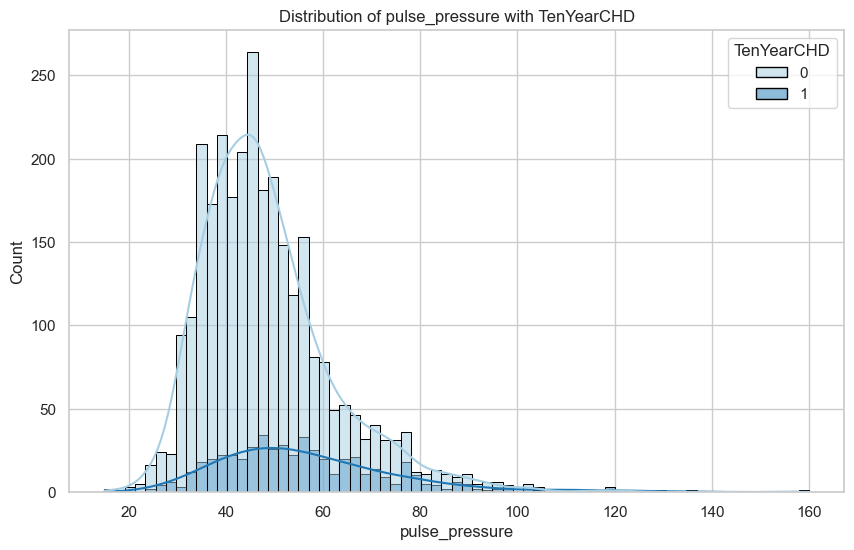

In [78]:
# Set up the figure and axes
plt.figure(figsize=(10, 6))

# Plot the data using seaborn
sns.histplot(data=df, x='pulse_pressure', hue='TenYearCHD', kde=True, palette='Paired', edgecolor='black')

# Add title and labels
plt.title('Distribution of pulse_pressure with TenYearCHD')
plt.xlabel('pulse_pressure')
plt.ylabel('Count')

# Show the plot
plt.show()

- There's a significant difference in the pulse pressure distribution between the two groups, it could suggest that pulse pressure might be associated with the risk of developing CHD over the next ten years.
- Here, histogram bars for individuals with a Ten-Year CHD risk are consistently lower compared to those without a risk,it suggests a potential association between pulse pressure and CHD risk.

- **The correlation between "is_smoking" and "cigsPerDay" is 0.76, indicating a strong relationship.**
- We can drop is_smoking column since we already have a column cigs_per_day, which gives the number of cigarettes smoked by the patient in a day. The patients who don't smoke have entered zero in this column.

- Since "cigsPerDay" already captures smoking behavior by representing the number of cigarettes smoked daily, "is_smoking" doesn't offer additional insights.
- **Therefore, we can drop the "is_smoking" column.**

In [79]:
# dropping is_smoking
df.drop('is_smoking',axis=1,inplace=True)

In [80]:
df.head()

,age,education,sex,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,BMI,heartRate,glucose,TenYearCHD,pulse_pressure
0,64,2.0,0,3.0,0.0,0,0,0,221.0,25.38,90.0,80.0,1,63.0
1,36,4.0,1,0.0,0.0,0,1,0,212.0,29.77,72.0,75.0,0,70.0
2,46,1.0,0,10.0,0.0,0,0,0,250.0,20.35,88.0,94.0,0,45.0
3,50,1.0,1,20.0,0.0,0,1,0,233.0,28.26,68.0,94.0,1,70.0
4,64,1.0,0,30.0,0.0,0,0,0,241.0,26.42,70.0,77.0,0,51.5


In [81]:
df.shape

(3390, 14)

In [82]:
# Assuming your dataframe is named df
# Reorder the columns to place "TenYearCHD" at the last position
df = df[[col for col in df if col != 'TenYearCHD'] + ['TenYearCHD']]

In [83]:
df.head()

,age,education,sex,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,BMI,heartRate,glucose,pulse_pressure,TenYearCHD
0,64,2.0,0,3.0,0.0,0,0,0,221.0,25.38,90.0,80.0,63.0,1
1,36,4.0,1,0.0,0.0,0,1,0,212.0,29.77,72.0,75.0,70.0,0
2,46,1.0,0,10.0,0.0,0,0,0,250.0,20.35,88.0,94.0,45.0,0
3,50,1.0,1,20.0,0.0,0,1,0,233.0,28.26,68.0,94.0,70.0,1
4,64,1.0,0,30.0,0.0,0,0,0,241.0,26.42,70.0,77.0,51.5,0


<Axes: title={'center': 'Correlation Analysis'}>

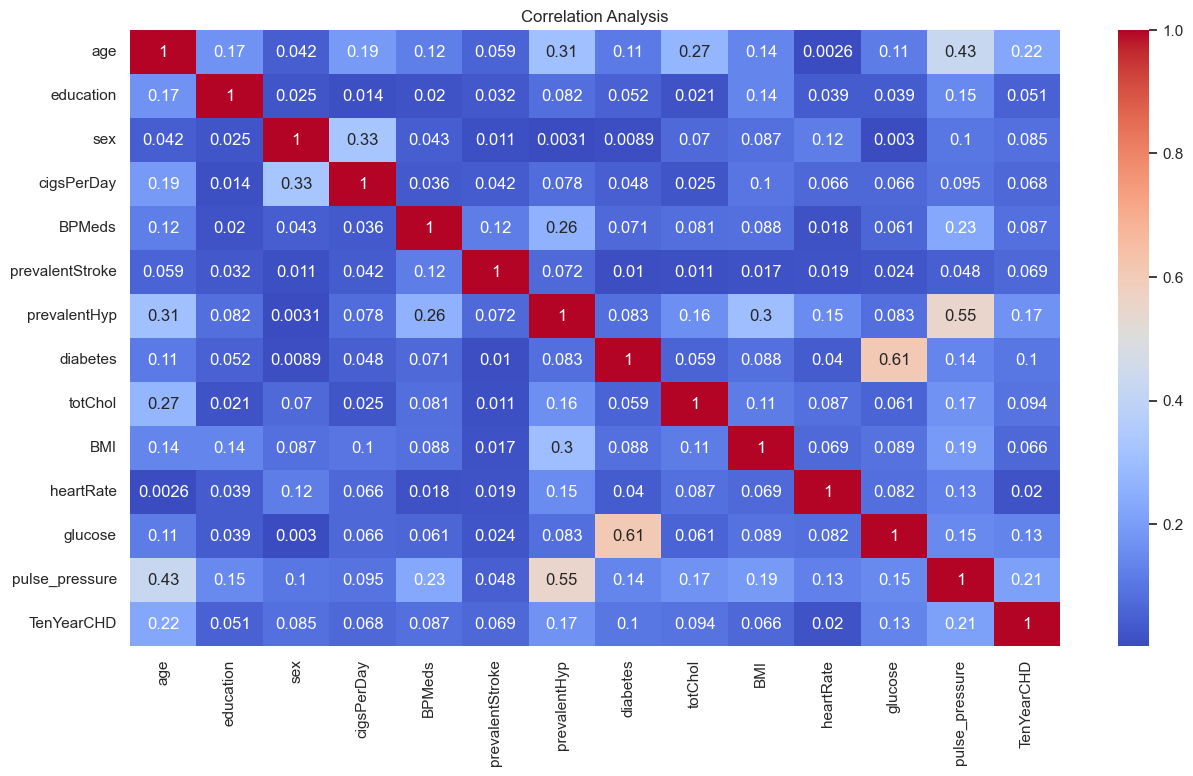

In [84]:
# Updated correlations
plt.figure(figsize=(15,8))
plt.title('Correlation Analysis')
correlation = df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

### Skewness treatment

In [85]:
continuous_var = df[["age", "cigsPerDay", "totChol", "BMI", "heartRate", "glucose", "pulse_pressure"]]

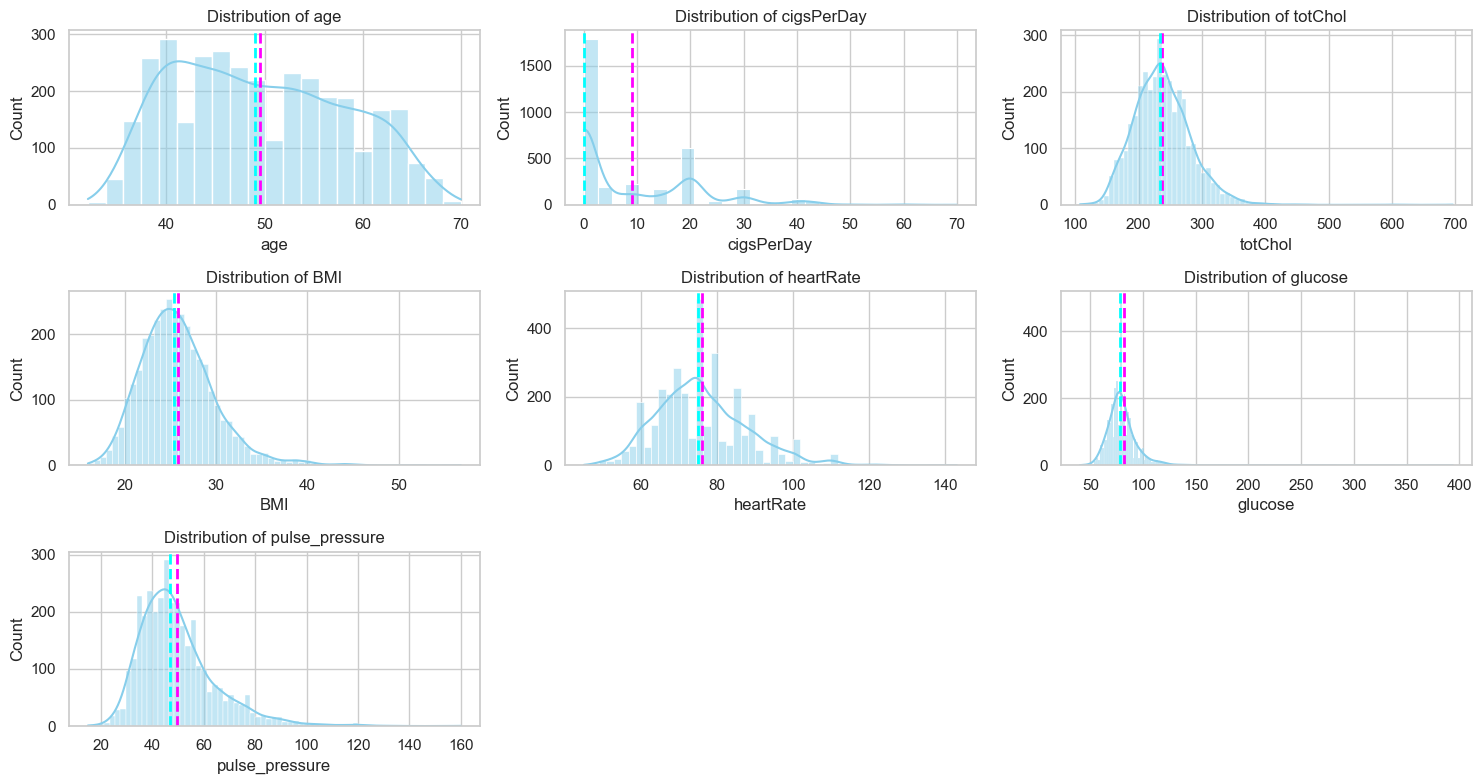

In [86]:
# Set up subplots
plt.figure(figsize=(15, 8))
for i, column in enumerate(continuous_var, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[column], kde=True, color='skyblue')
    plt.axvline(df[column].mean(), color='magenta', linestyle='dashed', linewidth=2)
    plt.axvline(df[column].median(), color='cyan', linestyle='dashed', linewidth=2)
    plt.title(f'Distribution of {column}')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [87]:
# Calculating skewness for each continuous variable
continuous_var.skew()

age               0.225796
cigsPerDay        1.232049
totChol           0.948170
BMI               1.025551
heartRate         0.676660
glucose           6.462108
pulse_pressure    1.412382
dtype: float64

- **age:** Skewness value is 0.226, indicating a slight right skew. Treatment might not be necessary.
- **cigsPerDay:** Skewness value is 1.232, indicating a moderate right skew.
- **totChol:** Skewness value is 0.948, indicating a moderate right skew.
- **BMI**: Skewness value is 1.025, indicating a moderate right skew.
- **heartRate:** Skewness value is 0.677, indicating a moderate right skew.
- **glucose:** Skewness value is 6.462, indicating a significant right skew.
- **pulse_pressure:** Skewness value is 1.412, indicating a moderate right skew.

- **The columns with moderate to significant right skewness are cigsPerDay, totChol, BMI, heartRate, glucose, and pulse_pressure.  These columns may benefit from skewness treatment to make the distributions more symmetrical.**

- For the "glucose" column with a skewness of 6.462108, PowerTransformer would likely be the better choice to transform the data and reduce its skewness.
- Also, for a more robust transformation method that can handle slightly heavier tails and outliers, PowerTransformer could be a better choice.

In [88]:
# Initializing PowerTransformer
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()

In [89]:
# Applying PowerTransformer to columns with skewness greater than 0.5
skewed_columns = ['cigsPerDay', 'totChol', 'BMI', 'heartRate', 'glucose', 'pulse_pressure']

for column in skewed_columns:
    if np.abs(df[column].skew()) > 0.5:
        df[column] = pt.fit_transform(df[column].values.reshape(-1, 1))

In [90]:
# Check skewness of transformed columns
skewness_after_transform = df[skewed_columns].skew()
skewness_after_transform

cigsPerDay        0.213674
totChol          -0.000646
BMI              -0.011416
heartRate        -0.001758
glucose          -0.232339
pulse_pressure   -0.013148
dtype: float64

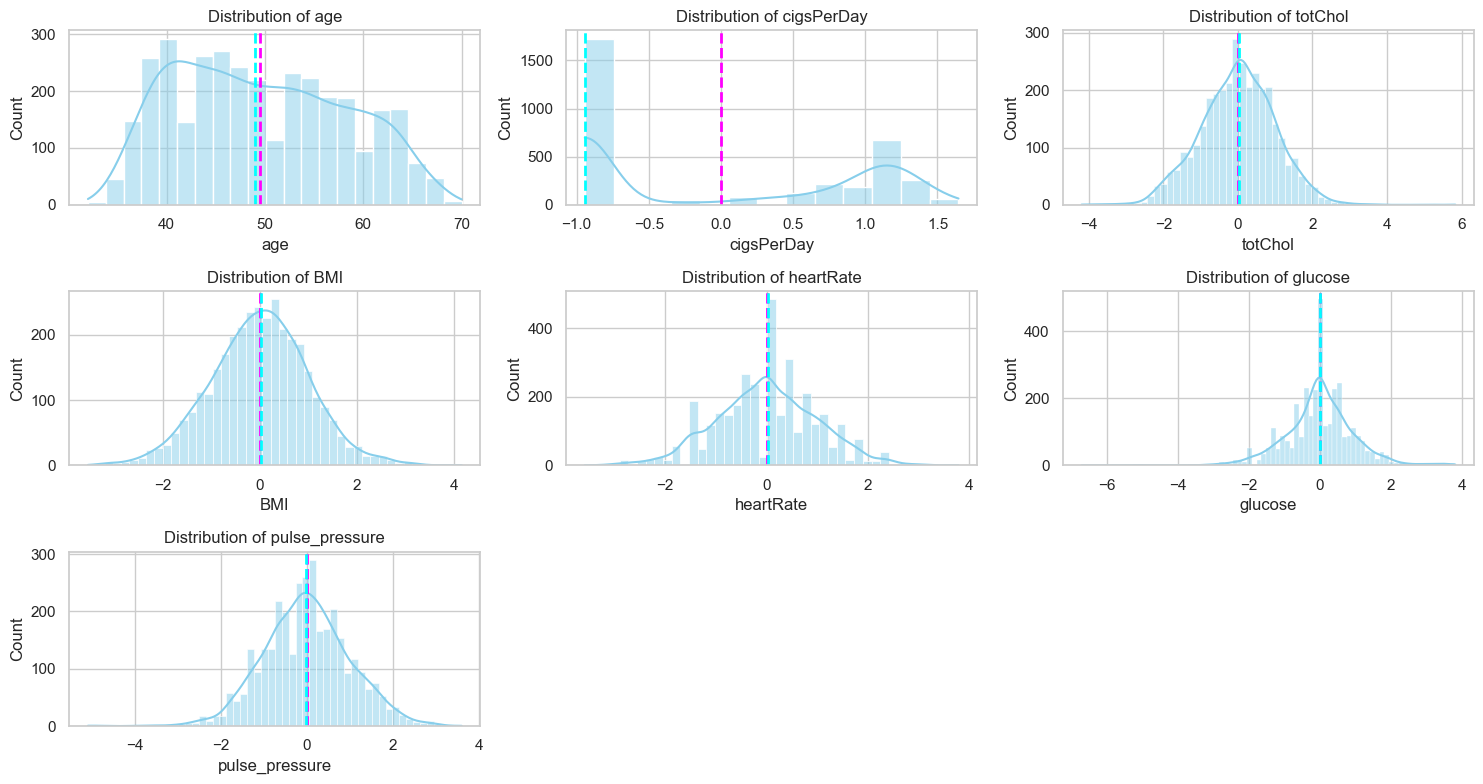

In [91]:
# Analysing the distribution of continuous varaibles after transformation
# Set up subplots
plt.figure(figsize=(15, 8))
for i, column in enumerate(continuous_var, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[column], kde=True, color='skyblue')
    plt.axvline(df[column].mean(), color='magenta', linestyle='dashed', linewidth=2)
    plt.axvline(df[column].median(), color='cyan', linestyle='dashed', linewidth=2)
    plt.title(f'Distribution of {column}')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

- Except cigsPerDay, we have successfully been able to reduce the skewness in the continuous variables. Now these distributions are closer to symmetric distribution.

In [92]:
df.shape

(3390, 14)

## Handling Outliers 

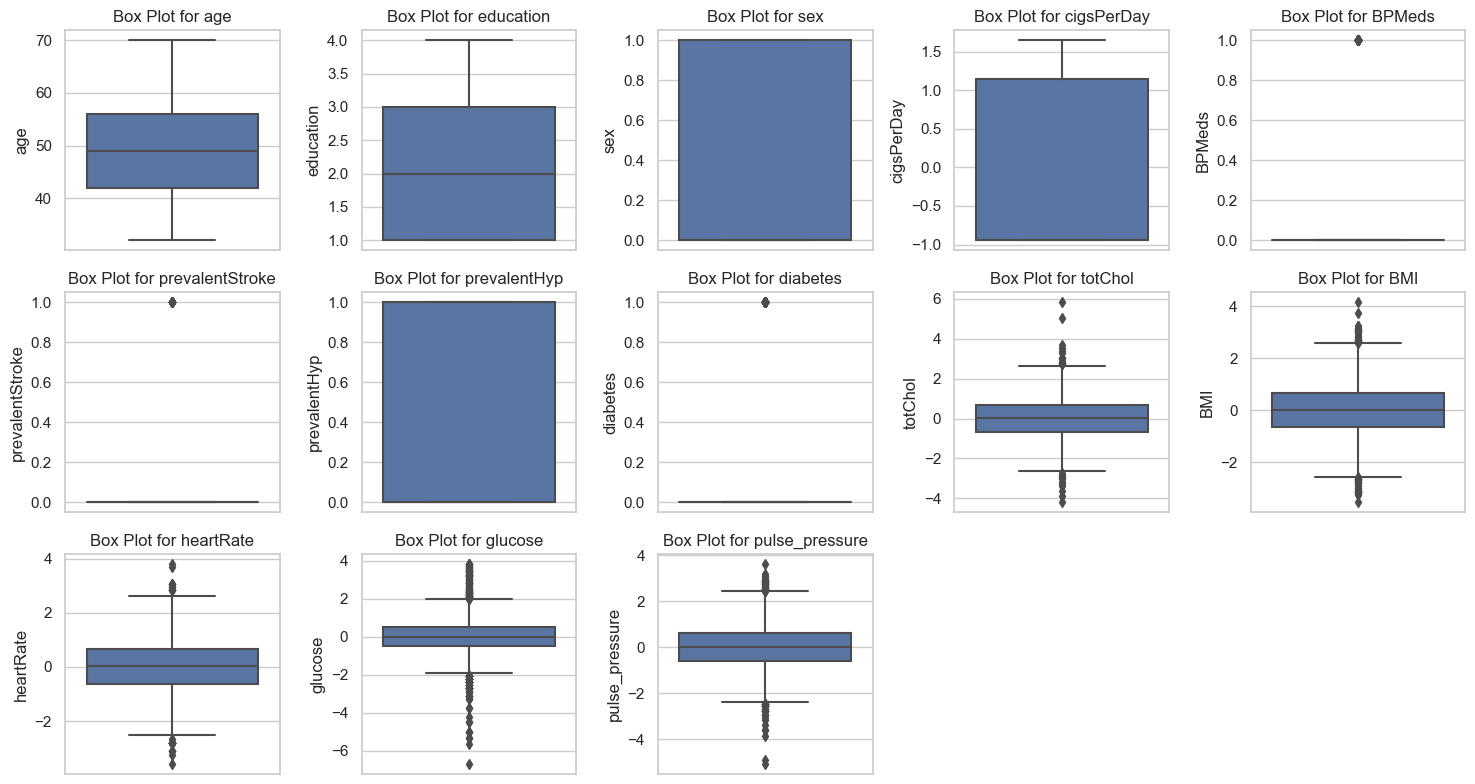

In [93]:
# Select numerical columns for box plots excluding the target variable 'TenYearCHD'
numerical_columns = df.drop('TenYearCHD', axis=1).columns

# Set up subplots
plt.figure(figsize=(15, 8))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 5, i)
    sns.boxplot(y=df[column])
    plt.title(f'Box Plot for {column}')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [94]:
def count_outliers(column):
    # Calculate IQR for the column
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1

    # Determine lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify and count outliers
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    return outliers.count()

# Print number of outliers for each column
for column in numerical_columns:
    outliers_count = count_outliers(df[column])
    print(f'Number of outliers in {column}: {outliers_count}')

Number of outliers in age: 0
Number of outliers in education: 0
Number of outliers in sex: 0
Number of outliers in cigsPerDay: 0
Number of outliers in BPMeds: 100
Number of outliers in prevalentStroke: 22
Number of outliers in prevalentHyp: 0
Number of outliers in diabetes: 87
Number of outliers in totChol: 26
Number of outliers in BMI: 48
Number of outliers in heartRate: 34
Number of outliers in glucose: 159
Number of outliers in pulse_pressure: 58


In [95]:
def find_outliers(df, column):
    # Calculate IQR for the column
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Determine lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify and return rows with outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Create an empty DataFrame to store outliers
outliers_df = pd.DataFrame()

# Iterate over numerical columns and find outliers
for column in numerical_columns:
    outliers = find_outliers(df, column)
    outliers_df = pd.concat([outliers_df, outliers])

# Display the DataFrame containing rows with outliers
outliers_df

,age,education,sex,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,BMI,heartRate,glucose,pulse_pressure,TenYearCHD
38,41,2.0,0,0.765057,1.0,1,1,0,-1.385020,-0.833210,1.301495,0.002393,-0.253169,0
104,57,1.0,0,-0.943540,1.0,0,1,0,-1.094010,0.199815,-2.098633,-1.136792,1.344914,0
163,67,1.0,0,-0.943540,1.0,0,1,0,0.401552,3.082813,-2.098633,-1.637356,2.105063,0
190,46,1.0,0,0.636758,1.0,0,1,0,0.987378,0.663392,-0.827593,-1.505010,1.680737,1
204,59,4.0,0,-0.943540,1.0,0,1,0,1.025484,0.856711,-0.247123,0.002393,0.066660,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3178,42,1.0,0,-0.943540,0.0,0,0,0,-0.899381,0.116884,-0.433248,-1.022851,-3.391985,0
3212,60,1.0,0,-0.943540,0.0,0,1,1,1.025484,0.776313,-0.339315,0.002393,2.861036,0
3250,60,2.0,0,1.146553,1.0,0,1,0,1.248517,-0.291659,1.167709,-2.067114,2.458473,0
3252,48,1.0,1,0.765057,0.0,0,1,0,-0.738049,0.594418,0.433910,1.804857,-2.491910,0


In [96]:
# Drop duplicate rows if any
outliers_df = outliers_df.drop_duplicates()
outliers_df

,age,education,sex,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,BMI,heartRate,glucose,pulse_pressure,TenYearCHD
38,41,2.0,0,0.765057,1.0,1,1,0,-1.385020,-0.833210,1.301495,0.002393,-0.253169,0
104,57,1.0,0,-0.943540,1.0,0,1,0,-1.094010,0.199815,-2.098633,-1.136792,1.344914,0
163,67,1.0,0,-0.943540,1.0,0,1,0,0.401552,3.082813,-2.098633,-1.637356,2.105063,0
190,46,1.0,0,0.636758,1.0,0,1,0,0.987378,0.663392,-0.827593,-1.505010,1.680737,1
204,59,4.0,0,-0.943540,1.0,0,1,0,1.025484,0.856711,-0.247123,0.002393,0.066660,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3020,39,3.0,0,1.146553,0.0,0,0,0,-1.094010,-0.826837,1.029902,-1.918099,-5.087801,0
3113,55,1.0,1,1.146553,0.0,0,1,0,0.569748,0.988258,-1.144779,-0.076305,2.538038,1
3178,42,1.0,0,-0.943540,0.0,0,0,0,-0.899381,0.116884,-0.433248,-1.022851,-3.391985,0
3252,48,1.0,1,0.765057,0.0,0,1,0,-0.738049,0.594418,0.433910,1.804857,-2.491910,0


- If I removed the outliers, I lost about 12% of the data. 
- So instead of removing outliers, I have replaced them with lower or upper bound. 

In [97]:
def remove_outliers(df):
    for column in numerical_columns:
        # Calculate IQR for the column
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        # Determine lower and upper bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Replace outliers with the lower or upper bound
        df[column] = df[column].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))
    
    return df

# Apply remove_outliers function to your DataFrame
df_cleaned = remove_outliers(df)

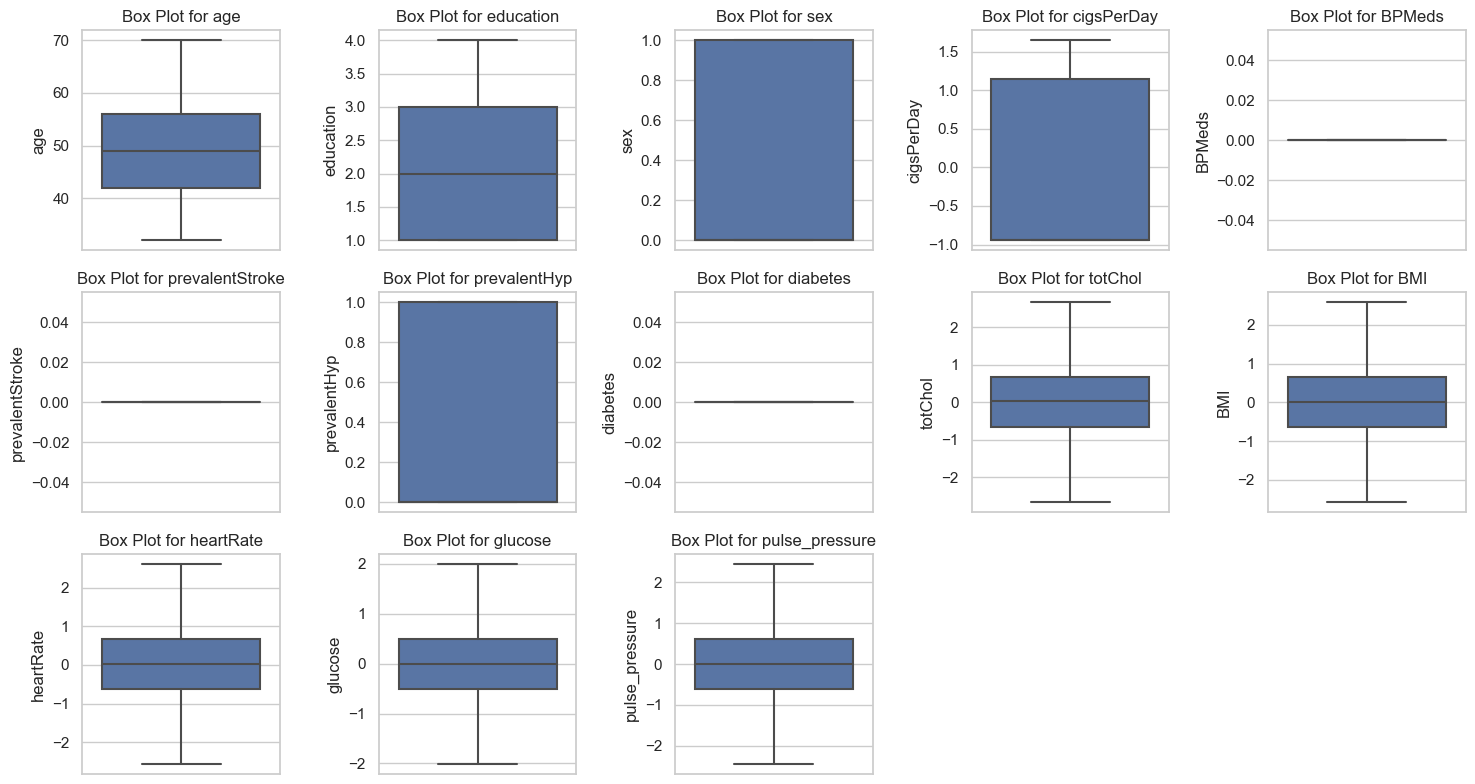

In [98]:
# Set up subplots
plt.figure(figsize=(15, 8))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 5, i)
    sns.boxplot(y=df_cleaned[column])
    plt.title(f'Box Plot for {column}')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [99]:
df_cleaned.shape

(3390, 14)

## Scaling the data

In [100]:
# Separating the target variable 'TenYearCHD' and the features
x = df_cleaned.drop('TenYearCHD', axis='columns')
y = df_cleaned['TenYearCHD']

In [101]:
# Separating the target variable 'TenYearCHD' and the features
Scaled_x = df_cleaned.drop('TenYearCHD', axis='columns')

In [102]:
# Initializing StandardScaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

# Standardizing the features using StandardScaler
data = sc.fit_transform(Scaled_x)

# Creating a new DataFrame 'x' with standardized features
x = pd.DataFrame(data, columns=Scaled_x.columns)

## Handling Imbalance Dataset

In [103]:
# Oversampling using Smote

# Creating an instance of SMOTE
from imblearn.over_sampling import SMOTE
sm=SMOTE()

# Oversampling the minority class using SMOTE
x,y=sm.fit_resample(x,y)

1    2879
0    2879
Name: TenYearCHD, dtype: int64

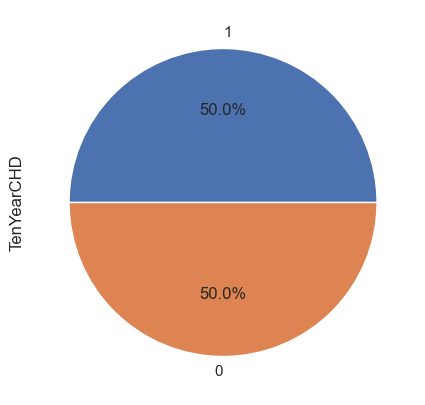

In [104]:
# Plotting a pie chart to visualize the class distribution after oversampling
plt.figure(figsize=(8,5))
y.value_counts().plot.pie(autopct='%1.1f%%')
y.value_counts()

- Data is balanced now, both the category of TenYearCHD have 50% data each.

- We have successfully oversampled the minority class using SMOTE. Now the model we build will be able to learn from both the classes without any bias.

In [105]:
print(x.shape)
print(y.shape)

(5758, 13)
(5758,)


## Model Building

In [106]:
from sklearn.model_selection import train_test_split  # Importing train_test_split function

# Splitting the dataset into training and testing sets
# X_train: Features for training
# X_test: Features for testing
# y_train: Target variable for training
# y_test: Target variable for testing
# test_size=0.2: 20% of the data will be used for testing
# random_state=42: Random seed for reproducibility
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [107]:
print(x_train.shape)
print(x_test.shape)

(4606, 13)
(1152, 13)


In [108]:
print(y_train.shape)
print(y_test.shape)

(4606,)
(1152,)


In [109]:
x_train.head()

,age,education,sex,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,BMI,heartRate,glucose,pulse_pressure
2330,1.566390,2.018819,-0.873425,-0.943540,0.0,0.0,1.473495,0.0,0.664635,-0.119771,-0.250391,-0.273098,0.460189
2117,-0.063106,0.053058,1.144919,0.192718,0.0,0.0,1.473495,0.0,0.300001,0.642266,0.019216,-0.178589,0.142333
3164,-0.761462,-0.929822,1.144919,1.146553,0.0,0.0,-0.678658,0.0,1.542845,0.407388,-0.438563,2.245757,-0.730744
2868,0.402464,0.053058,-0.873425,-0.943540,0.0,0.0,1.473495,0.0,-0.019996,0.040993,0.823599,-0.370704,1.614553
2263,-1.343425,0.053058,-0.873425,0.765057,0.0,0.0,-0.678658,0.0,-1.408665,0.939365,0.823599,-1.030173,0.743752


In [110]:
x_test.head()

,age,education,sex,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,BMI,heartRate,glucose,pulse_pressure
3162,0.169679,0.053058,1.144919,-0.943540,0.0,0.0,-0.678658,0.0,-0.236209,0.610549,-0.634014,1.278664,-0.630449
4628,0.742103,0.823252,1.144919,-0.943540,0.0,0.0,-0.678658,0.0,-0.454191,0.920751,-1.723167,-0.170247,0.412080
3590,-1.086744,-0.240937,1.144919,1.269406,0.0,0.0,1.473495,0.0,1.001163,1.249709,0.314999,0.581655,-1.965184
4217,1.129431,1.116473,1.144919,1.331369,0.0,0.0,1.473495,0.0,0.069246,0.681609,-0.900707,1.222131,1.203466
3128,-1.576210,1.035939,-0.873425,1.014348,0.0,0.0,-0.678658,0.0,-1.408665,0.175369,1.937204,0.001673,-0.175277


- We have scaled down the variables using standard scaler.

## Model Selection

In [111]:
# import Classification Models and necessary metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import  GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve

## 1) Logistic Regression

In [112]:
# Fitting model
lr_model = LogisticRegression()

# training the model
lr_model.fit(x_train, y_train)

# Train predictions
lr_train_pred = lr_model.predict(x_train)

# Test predictions
lr_test_pred = lr_model.predict(x_test)

In [113]:
# Evaluating the model
lr_train_accuracy = accuracy_score(y_train, lr_train_pred)
print("Train Accuracy of Logistic Regression:", lr_train_accuracy)

print("********"*10)

lr_test_accuracy = accuracy_score(y_test, lr_test_pred)
print("Test Accuracy of Logistic Regression:", lr_test_accuracy)

Train Accuracy of Logistic Regression: 0.672818063395571
********************************************************************************
Test Accuracy of Logistic Regression: 0.6814236111111112


In [114]:
# Train recall
lr_train_recall = recall_score(y_train, lr_train_pred)
print("Train Recall Score of Logistic Regression:", lr_train_recall)

print("*******"*10)

# Test recall
lr_test_recall = recall_score(y_test, lr_test_pred)
print("Test Recall Score of Logistic Regression:", lr_test_recall)

Train Recall Score of Logistic Regression: 0.687392055267703
**********************************************************************
Test Recall Score of Logistic Regression: 0.6785079928952042


Confusion Matrix:
 [[1507  783]
 [ 724 1592]]
**************************************************
Confusion Matrix:
 [[403 186]
 [181 382]]


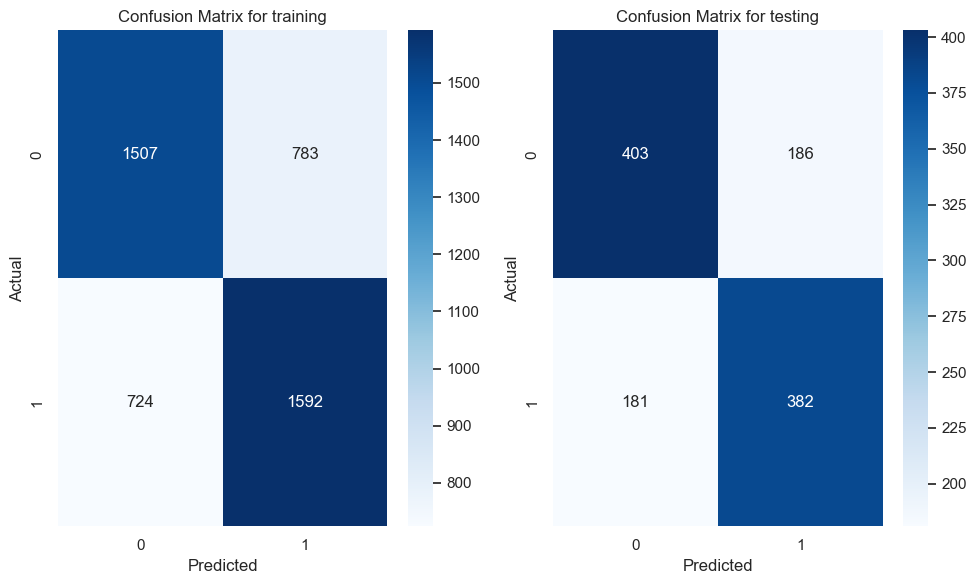

In [115]:
# Confusion Matrix for training
lr_conf_matrix_train = confusion_matrix(y_train, lr_train_pred)
print("Confusion Matrix:\n", lr_conf_matrix_train)

print("*****"*10)

# Confusion Matrix for testing
lr_conf_matrix_test = confusion_matrix(y_test, lr_test_pred)
print("Confusion Matrix:\n", lr_conf_matrix_test)

# Set up the subplots
plt.figure(figsize=(10, 6))

# Plotting Confusion Matrix for training
plt.subplot(1, 2, 1)
sns.heatmap(lr_conf_matrix_train, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix for training')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Plotting Confusion Matrix for testing
plt.subplot(1, 2, 2)
sns.heatmap(lr_conf_matrix_test, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix for testing')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Show plots
plt.tight_layout()
plt.show()

In [116]:
# Classification Report for Training
lr_class_report_train = classification_report(y_train, lr_train_pred)
print("Classification Report for Training:\n", lr_class_report_train)

print("*******"*10)

# Classification Report for Testing
lr_class_report_test = classification_report(y_test, lr_test_pred)
print("Classification Report for Testing:\n", lr_class_report_test)

Classification Report for Training:
               precision    recall  f1-score   support

           0       0.68      0.66      0.67      2290
           1       0.67      0.69      0.68      2316

    accuracy                           0.67      4606
   macro avg       0.67      0.67      0.67      4606
weighted avg       0.67      0.67      0.67      4606

**********************************************************************
Classification Report for Testing:
               precision    recall  f1-score   support

           0       0.69      0.68      0.69       589
           1       0.67      0.68      0.68       563

    accuracy                           0.68      1152
   macro avg       0.68      0.68      0.68      1152
weighted avg       0.68      0.68      0.68      1152



Train ROC AUC Score: 0.6727353289438951
**********************************************************************
Test ROC AUC Score: 0.6813592596054969


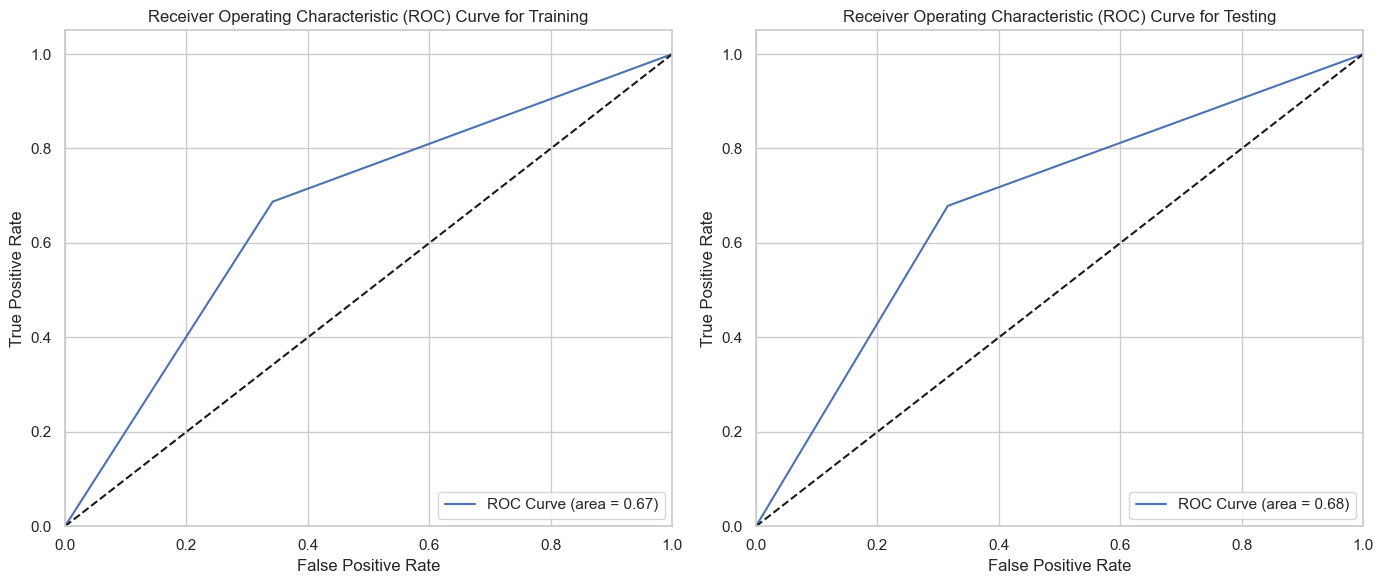

In [117]:
# ROC AUC Score for training
lr_train_roc_auc = roc_auc_score(y_train, lr_train_pred)
print("Train ROC AUC Score:", lr_train_roc_auc)

print("*******"*10)

# ROC AUC Score for testing
lr_test_roc_auc = roc_auc_score(y_test, lr_test_pred)
print("Test ROC AUC Score:", lr_test_roc_auc)

# Set up the subplots
plt.figure(figsize=(14, 6))

# Plotting ROC Curve for training
plt.subplot(1, 2, 1)
fpr, tpr, thresholds = roc_curve(y_train, lr_train_pred)
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % lr_train_roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Training')
plt.legend(loc="lower right")

# Plotting ROC Curve for Testing
plt.subplot(1, 2, 2)
fpr, tpr, thresholds = roc_curve(y_test, lr_test_pred)
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % lr_test_roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Testing')
plt.legend(loc="lower right")

# Show plots
plt.tight_layout()
plt.show()

## 2) K Nearest Neighbors:

### Choose the best K-Value(HyperParameter Tunning - cross-validation )

- When choosing the range of values for k in the k-nearest neighbors (KNN) algorithm, it's common to consider the square root of the number of records in the training dataset as a guideline. 
- By doing so, you aim to balance the bias-variance trade-off, as using too small or too large values of 𝑘 can lead to overfitting or underfitting, respectively.

In [118]:
# Value of k taken upto sqrt(n)
# Where n is no of records in the train dataset
# sqrt(5758) = 75.92

In [119]:
from sklearn.model_selection import GridSearchCV

# Define the range of n_neighbors values to evaluate
param_grid = {'n_neighbors': range(1, 80)}  # You can adjust this range as needed

# Initialize KNN classifier
knn = KNeighborsClassifier()

# GridSearchCV for training data
grid_search_train = GridSearchCV(knn, param_grid, cv=5, scoring='recall')
grid_search_train.fit(x_train, y_train)

# GridSearchCV for testing data
grid_search_test = GridSearchCV(knn, param_grid, cv=5, scoring='recall')
grid_search_test.fit(x_test, y_test)

# Get the best K-value for training data
best_k_train = grid_search_train.best_params_['n_neighbors']
print("Best K-value for training data:", best_k_train)

# Get the best K-value for testing data
best_k_test = grid_search_test.best_params_['n_neighbors']
print("Best K-value for testing data:", best_k_test)

Best K-value for training data: 1
Best K-value for testing data: 1


In [120]:
# Initialize KNN model with a chosen number of neighbors
knn_model = KNeighborsClassifier(n_neighbors=1)

# Train the KNN model
knn_model.fit(x_train, y_train)

# Predictions on the training data
knn_train_pred = knn_model.predict(x_train)

# Predictions on the testing data
knn_test_pred = knn_model.predict(x_test)

In [121]:
# Evaluating the model
knn_train_accuracy = accuracy_score(y_train, knn_train_pred)
print("Train Accuracy of KNN:", knn_train_accuracy)

print("********"*10)

knn_test_accuracy = accuracy_score(y_test, knn_test_pred)
print("Test Accuracy of KNN:", knn_test_accuracy)

Train Accuracy of KNN: 1.0
********************************************************************************
Test Accuracy of KNN: 0.8619791666666666


In [122]:
# Train recall
knn_train_recall = recall_score(y_train, knn_train_pred)
print("Train Recall Score of KNN:", knn_train_recall)

print("*******"*10)

# Test recall
knn_test_recall = recall_score(y_test, knn_test_pred)
print("Test Recall Score of KNN:", knn_test_recall)

Train Recall Score of KNN: 1.0
**********************************************************************
Test Recall Score of KNN: 0.9804618117229129


Confusion Matrix:
 [[2290    0]
 [   0 2316]]
**************************************************
Confusion Matrix:
 [[441 148]
 [ 11 552]]


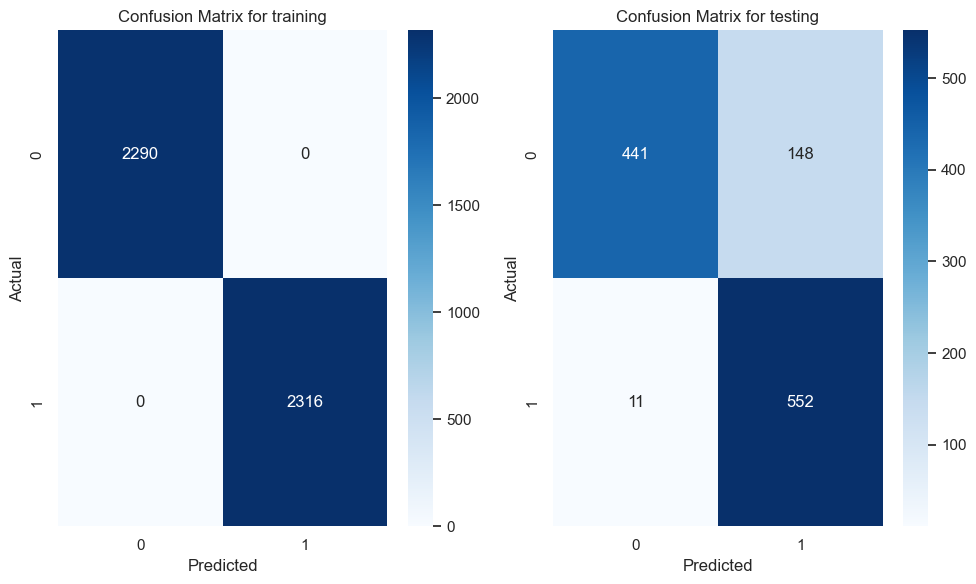

In [123]:
# Confusion Matrix for training
knn_conf_matrix_train = confusion_matrix(y_train, knn_train_pred)
print("Confusion Matrix:\n", knn_conf_matrix_train)

print("*****"*10)

# Confusion Matrix for testing
knn_conf_matrix_test = confusion_matrix(y_test, knn_test_pred)
print("Confusion Matrix:\n", knn_conf_matrix_test)

# Set up the subplots
plt.figure(figsize=(10, 6))

# Plotting Confusion Matrix for training
plt.subplot(1, 2, 1)
sns.heatmap(knn_conf_matrix_train, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix for training')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Plotting Confusion Matrix for testing
plt.subplot(1, 2, 2)
sns.heatmap(knn_conf_matrix_test, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix for testing')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Show plots
plt.tight_layout()
plt.show()

In [124]:
# Classification Report for Training
knn_class_report_train = classification_report(y_train, knn_train_pred)
print("Classification Report for Traing:\n", knn_class_report_train)

print("*******"*10)

# Classification Report for Testing
knn_class_report_test = classification_report(y_test, knn_test_pred)
print("Classification Report for Testing:\n", knn_class_report_test)

Classification Report for Traing:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2290
           1       1.00      1.00      1.00      2316

    accuracy                           1.00      4606
   macro avg       1.00      1.00      1.00      4606
weighted avg       1.00      1.00      1.00      4606

**********************************************************************
Classification Report for Testing:
               precision    recall  f1-score   support

           0       0.98      0.75      0.85       589
           1       0.79      0.98      0.87       563

    accuracy                           0.86      1152
   macro avg       0.88      0.86      0.86      1152
weighted avg       0.88      0.86      0.86      1152



Train ROC AUC Score: 1.0
**********************************************************************
Test ROC AUC Score: 0.8645942335354803


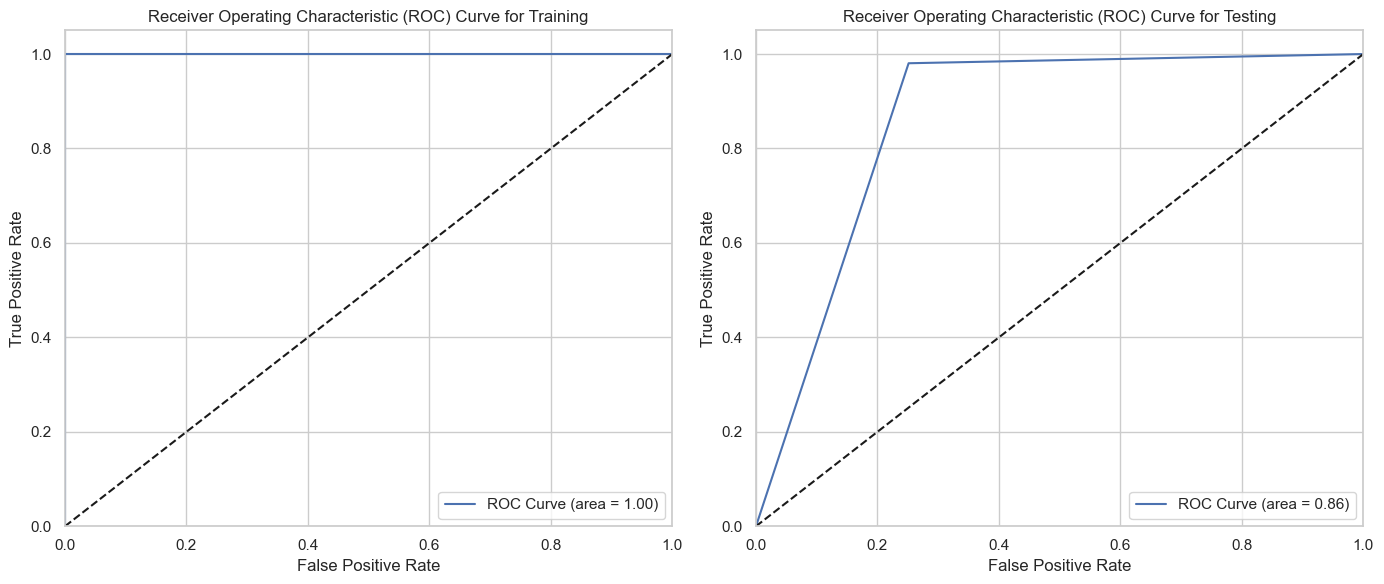

In [125]:
# ROC AUC Score for training
knn_train_roc_auc = roc_auc_score(y_train, knn_train_pred)
print("Train ROC AUC Score:", knn_train_roc_auc)

print("*******"*10)

# ROC AUC Score for testing
knn_test_roc_auc = roc_auc_score(y_test, knn_test_pred)
print("Test ROC AUC Score:", knn_test_roc_auc)

# Set up the subplots
plt.figure(figsize=(14, 6))

# Plotting ROC Curve for training
plt.subplot(1, 2, 1)
fpr, tpr, thresholds = roc_curve(y_train, knn_train_pred)
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % knn_train_roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Training')
plt.legend(loc="lower right")

# Plotting ROC Curve for Testing
plt.subplot(1, 2, 2)
fpr, tpr, thresholds = roc_curve(y_test, knn_test_pred)
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % knn_test_roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Testing')
plt.legend(loc="lower right")

# Show plots
plt.tight_layout()
plt.show()

## 3) Naive Bayes

In [126]:
# Create a Gaussian Naive Bayes classifier
nb_model = GaussianNB()

# Train the classifier
nb_model.fit(x_train, y_train)

# Predictions on the training data
nb_train_pred = nb_model.predict(x_train)

# Predictions on the testing data
nb_test_pred = nb_model.predict(x_test)

In [127]:
# Evaluating the model
nb_train_accuracy = accuracy_score(y_train, nb_train_pred)
print("Train Accuracy of Naive Bayes:", nb_train_accuracy)

print("********"*10)

nb_test_accuracy = accuracy_score(y_test, nb_test_pred)
print("Test Accuracy of Naive Bayes:", nb_test_accuracy)

Train Accuracy of Naive Bayes: 0.6606600086843248
********************************************************************************
Test Accuracy of Naive Bayes: 0.6614583333333334


In [128]:
# Train recall
nb_train_recall = recall_score(y_train, nb_train_pred)
print("Train Recall Score of Gaussian Naive Bayes:", nb_train_recall)

print("*******"*10)

# Test recall
nb_test_recall = recall_score(y_test, nb_test_pred)
print("Test Recall Score of Gaussian Naive Bayes:", nb_test_recall)

Train Recall Score of Gaussian Naive Bayes: 0.6580310880829016
**********************************************************************
Test Recall Score of Gaussian Naive Bayes: 0.655417406749556


Confusion Matrix:
 [[1519  771]
 [ 792 1524]]
**************************************************
Confusion Matrix:
 [[393 196]
 [194 369]]


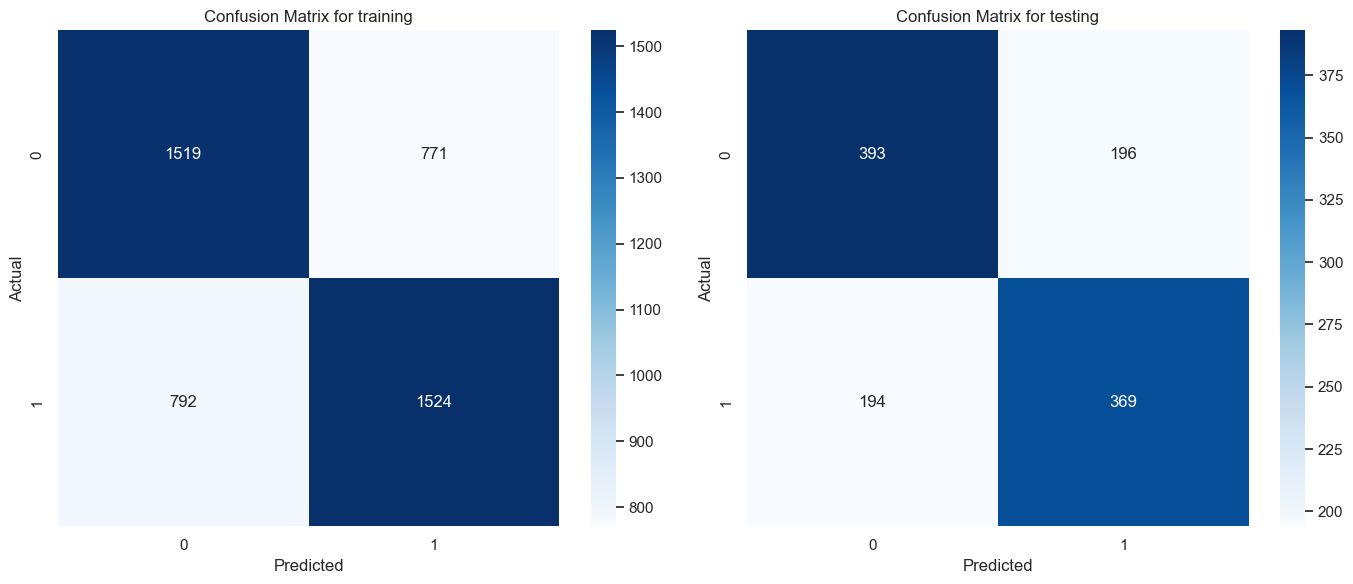

In [129]:
# Confusion Matrix for training
nb_conf_matrix_train = confusion_matrix(y_train, nb_train_pred)
print("Confusion Matrix:\n", nb_conf_matrix_train)

print("*****"*10)

# Confusion Matrix for testing
nb_conf_matrix_test = confusion_matrix(y_test, nb_test_pred)
print("Confusion Matrix:\n", nb_conf_matrix_test)

# Set up the subplots
plt.figure(figsize=(14, 6))

# Plotting Confusion Matrix for training
plt.subplot(1, 2, 1)
sns.heatmap(nb_conf_matrix_train, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix for training')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Plotting Confusion Matrix for testing
plt.subplot(1, 2, 2)
sns.heatmap(nb_conf_matrix_test, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix for testing')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Show plots
plt.tight_layout()
plt.show()

In [130]:
# Classification Report for Training
nb_class_report_train = classification_report(y_train, nb_train_pred)
print("Classification Report for Traing:\n", nb_class_report_train)

print("*******"*10)

# Classification Report for Testing
nb_class_report_test = classification_report(y_test, nb_test_pred)
print("Classification Report for Testing:\n", nb_class_report_test)

Classification Report for Traing:
               precision    recall  f1-score   support

           0       0.66      0.66      0.66      2290
           1       0.66      0.66      0.66      2316

    accuracy                           0.66      4606
   macro avg       0.66      0.66      0.66      4606
weighted avg       0.66      0.66      0.66      4606

**********************************************************************
Classification Report for Testing:
               precision    recall  f1-score   support

           0       0.67      0.67      0.67       589
           1       0.65      0.66      0.65       563

    accuracy                           0.66      1152
   macro avg       0.66      0.66      0.66      1152
weighted avg       0.66      0.66      0.66      1152



Train ROC AUC Score: 0.660674932687739
**********************************************************************
Test ROC AUC Score: 0.661325002186323


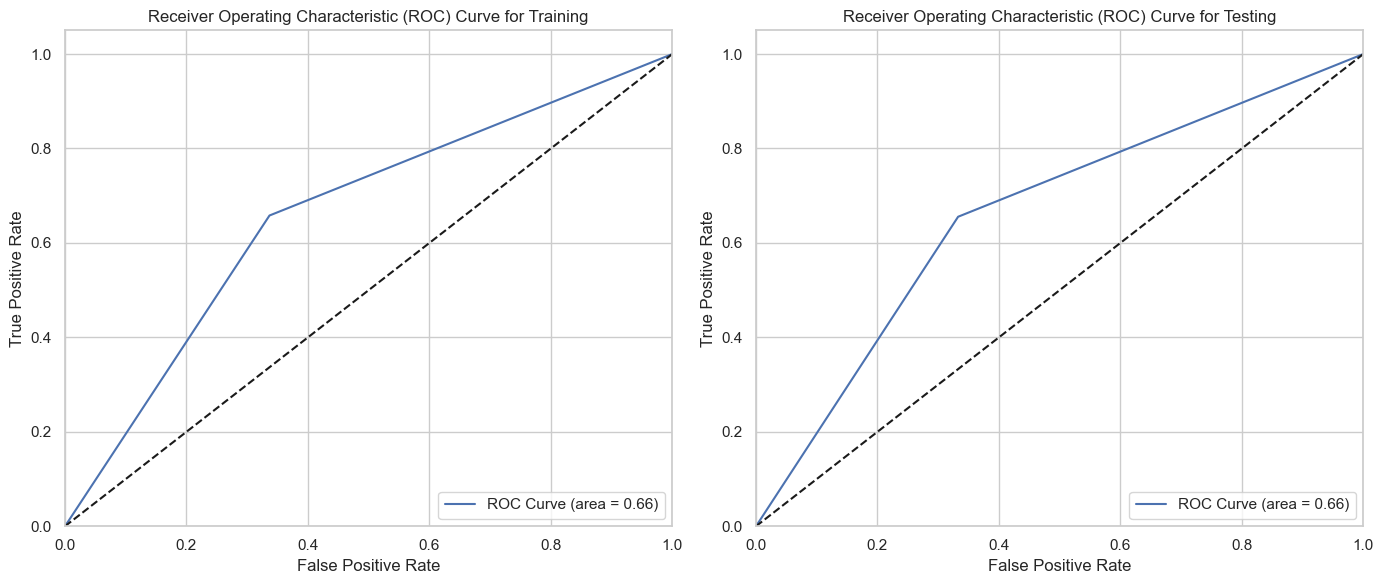

In [131]:
# ROC AUC Score for training
nb_train_roc_auc = roc_auc_score(y_train, nb_train_pred)
print("Train ROC AUC Score:", nb_train_roc_auc)

print("*******"*10)

# ROC AUC Score for testing
nb_test_roc_auc = roc_auc_score(y_test, nb_test_pred)
print("Test ROC AUC Score:", nb_test_roc_auc)

# Set up the subplots
plt.figure(figsize=(14, 6))

# Plotting ROC Curve for training
plt.subplot(1, 2, 1)
fpr, tpr, thresholds = roc_curve(y_train, nb_train_pred)
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % nb_train_roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Training')
plt.legend(loc="lower right")

# Plotting ROC Curve for Testing
plt.subplot(1, 2, 2)
fpr, tpr, thresholds = roc_curve(y_test, nb_test_pred)
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % nb_test_roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Testing')
plt.legend(loc="lower right")

# Show plots
plt.tight_layout()
plt.show()

## 4) Decision Tree

In [132]:
# Create a  Decision Tree classifier
dt_model = DecisionTreeClassifier()

# Train the classifier
dt_model.fit(x_train, y_train)

# Predictions on the training data
dt_train_pred = dt_model.predict(x_train)

# Predictions on the testing data
dt_test_pred = dt_model.predict(x_test)

In [133]:
# Evaluating the model
dt_train_accuracy = accuracy_score(y_train, dt_train_pred)
print("Train Accuracy of Decision Tree:", dt_train_accuracy)

print("********"*10)

dt_test_accuracy = accuracy_score(y_test, dt_test_pred)
print("Test Accuracy of Decision Tree:", dt_test_accuracy)

Train Accuracy of Decision Tree: 1.0
********************************************************************************
Test Accuracy of Decision Tree: 0.7725694444444444


In [134]:
# Train recall
dt_train_recall = recall_score(y_train, dt_train_pred)
print("Train Recall Score of Decision Tree:", dt_train_recall)

print("*******"*10)

# Test recall
dt_test_recall = recall_score(y_test, dt_test_pred)
print("Test Recall Score of Decision Tree:", dt_test_recall)

Train Recall Score of Decision Tree: 1.0
**********************************************************************
Test Recall Score of Decision Tree: 0.7992895204262878


In [135]:
# Confusion Matrix for training
dt_conf_matrix_train = confusion_matrix(y_train, dt_train_pred)
print("Confusion Matrix:\n", dt_conf_matrix_train)

print("*****"*10)

# Confusion Matrix for testing
dt_conf_matrix_test = confusion_matrix(y_test, dt_test_pred)
print("Confusion Matrix:\n", dt_conf_matrix_test)

Confusion Matrix:
 [[2290    0]
 [   0 2316]]
**************************************************
Confusion Matrix:
 [[440 149]
 [113 450]]


In [136]:
# Classification Report for Training
dt_class_report_train = classification_report(y_train, dt_train_pred)
print("Classification Report for Traing:\n", dt_class_report_train)

print("*******"*10)

# Classification Report for Testing
dt_class_report_test = classification_report(y_test, dt_test_pred)
print("Classification Report for Testing:\n", dt_class_report_test)

Classification Report for Traing:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2290
           1       1.00      1.00      1.00      2316

    accuracy                           1.00      4606
   macro avg       1.00      1.00      1.00      4606
weighted avg       1.00      1.00      1.00      4606

**********************************************************************
Classification Report for Testing:
               precision    recall  f1-score   support

           0       0.80      0.75      0.77       589
           1       0.75      0.80      0.77       563

    accuracy                           0.77      1152
   macro avg       0.77      0.77      0.77      1152
weighted avg       0.77      0.77      0.77      1152



In [137]:
# ROC AUC Score for training
dt_train_roc_auc = roc_auc_score(y_train, dt_train_pred)
print("Train ROC AUC Score:", dt_train_roc_auc)

print("*******"*10)

# ROC AUC Score for testing
dt_test_roc_auc = roc_auc_score(y_test, dt_test_pred)
print("Test ROC AUC Score:", dt_test_roc_auc)

Train ROC AUC Score: 1.0
**********************************************************************
Test ROC AUC Score: 0.7731591914525326


### HyperParameter Tunning - GridSearchCV

In [138]:
from sklearn.model_selection import GridSearchCV

# Create a Decision Tree classifier
dt_model = DecisionTreeClassifier()

# Define the hyperparameters and their values to search over
param_grid = {
    'max_depth': [3, 5, 7, 10],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

# Define the GridSearchCV object
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, scoring='recall')

# Fit the GridSearchCV object to the data
grid_search.fit(x_train, y_train)

# Get the best parameters found by GridSearchCV
best_params = grid_search.best_params_

# Print the best parameters
print("Best parameters:", best_params)

Best parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [139]:
# Create a Decision Tree classifier with the best hyperparameters
DT_model = DecisionTreeClassifier(max_depth=best_params['max_depth'],
                                  min_samples_split=best_params['min_samples_split'],
                                  min_samples_leaf=best_params['min_samples_leaf'])

# Fit the model to the training data
DT_model.fit(x_train, y_train)

# Predictions on the training data
DT_train_pred = DT_model.predict(x_train)

# Predictions on the testing data
DT_test_pred = DT_model.predict(x_test)

In [140]:
# Evaluating the model
DT_test_accuracy = accuracy_score(y_test, DT_test_pred)
print("Test Accuracy of Decision Tree:", DT_test_accuracy)

Test Accuracy of Decision Tree: 0.7309027777777778


In [141]:
# Test recall
DT_test_recall = recall_score(y_test, DT_test_pred)
print("Test Recall Score of Decision Tree:", DT_test_recall)

Test Recall Score of Decision Tree: 0.8312611012433393


Confusion Matrix:
 [[374 215]
 [ 95 468]]


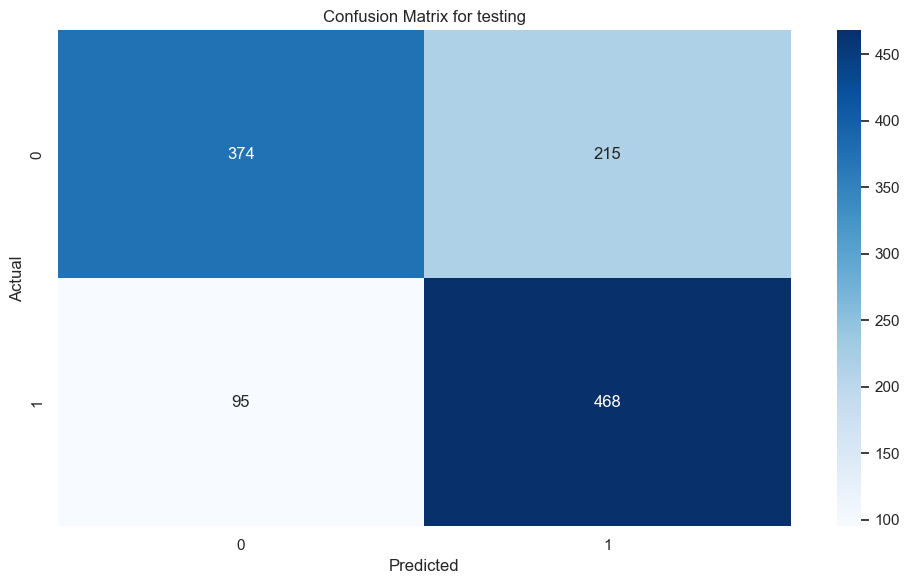

In [142]:
# Confusion Matrix for testing
DT_conf_matrix_test = confusion_matrix(y_test, DT_test_pred)
print("Confusion Matrix:\n", DT_conf_matrix_test)

# Set up the subplots
plt.figure(figsize=(10, 6))

# Plotting Confusion Matrix for testing
sns.heatmap(DT_conf_matrix_test, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix for testing')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Show plots
plt.tight_layout()
plt.show()

In [143]:
# Classification Report for Testing
DT_class_report_test = classification_report(y_test, DT_test_pred)
print("Classification Report for Testing:\n", DT_class_report_test)

Classification Report for Testing:
               precision    recall  f1-score   support

           0       0.80      0.63      0.71       589
           1       0.69      0.83      0.75       563

    accuracy                           0.73      1152
   macro avg       0.74      0.73      0.73      1152
weighted avg       0.74      0.73      0.73      1152



Test ROC AUC Score: 0.7331178171751501


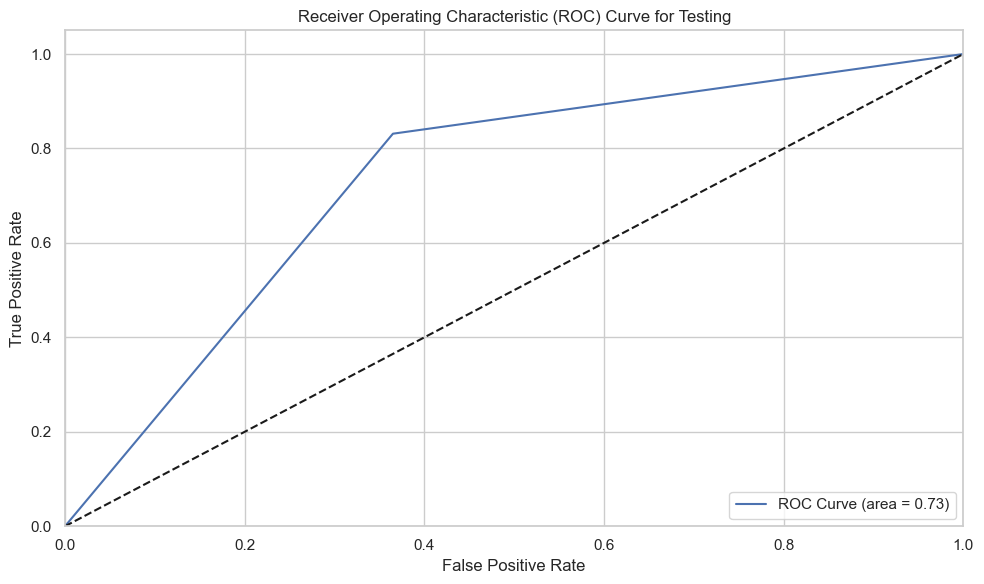

In [144]:
# ROC AUC Score for testing
DT_test_roc_auc = roc_auc_score(y_test, DT_test_pred)
print("Test ROC AUC Score:", DT_test_roc_auc)

# Set up the subplots
plt.figure(figsize=(10, 6))

# Plotting ROC Curve for Testing
fpr, tpr, thresholds = roc_curve(y_test, DT_test_pred)
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % DT_test_roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Testing')
plt.legend(loc="lower right")

# Show plots
plt.tight_layout()
plt.show()

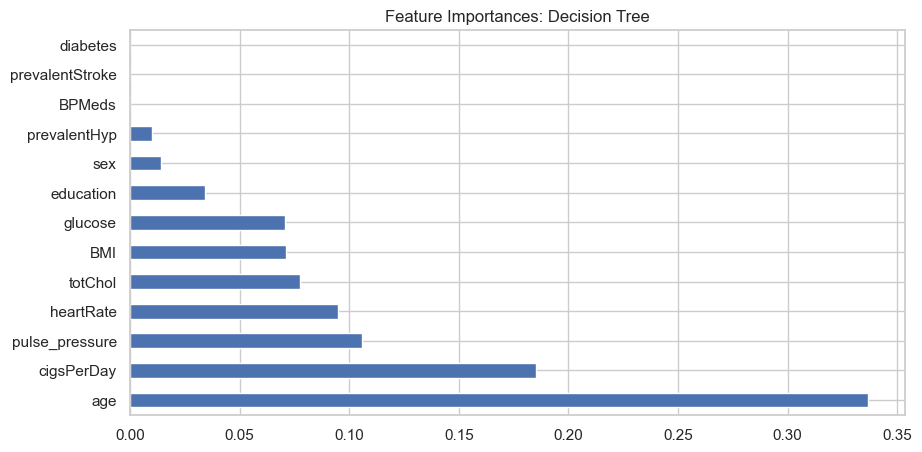

In [145]:
# Feature importances
DT_feat_imp = pd.Series(DT_model.feature_importances_, index=x.columns)
plt.figure(figsize=(10, 5))
plt.title('Feature Importances: Decision Tree')
plt.xlabel('Relative Importance')
DT_feat_imp.nlargest(20).plot(kind='barh')
plt.show()

## 5) Random Forest

In [146]:
# Create a Random Forest classifier
rf_model = RandomForestClassifier()

# Train the classifier
rf_model.fit(x_train, y_train)

# Predictions on the training data
rf_train_pred = rf_model.predict(x_train)

# Predictions on the testing data
rf_test_pred = rf_model.predict(x_test)

In [147]:
# Evaluating the model
rf_train_accuracy = accuracy_score(y_train, rf_train_pred)
print("Train Accuracy of Random Forest:", rf_train_accuracy)

print("********"*10)

rf_test_accuracy = accuracy_score(y_test, rf_test_pred)
print("Test Accuracy of Random Forest:", rf_test_accuracy)

Train Accuracy of Random Forest: 1.0
********************************************************************************
Test Accuracy of Random Forest: 0.8888888888888888


In [148]:
# Train recall
rf_train_recall = recall_score(y_train, rf_train_pred)
print("Train Recall Score of Random Forest:", rf_train_recall)

print("*******"*10)

# Test recall
rf_test_recall = recall_score(y_test, rf_test_pred)
print("Test Recall Score of Random Forest:", rf_test_recall)

Train Recall Score of Random Forest: 1.0
**********************************************************************
Test Recall Score of Random Forest: 0.8916518650088809


In [149]:
# Confusion Matrix for training
rf_conf_matrix_train = confusion_matrix(y_train, rf_train_pred)
print("Confusion Matrix:\n", rf_conf_matrix_train)

print("*****"*10)

# Confusion Matrix for testing
rf_conf_matrix_test = confusion_matrix(y_test, rf_test_pred)
print("Confusion Matrix:\n", rf_conf_matrix_test)

Confusion Matrix:
 [[2290    0]
 [   0 2316]]
**************************************************
Confusion Matrix:
 [[522  67]
 [ 61 502]]


In [150]:
# Classification Report for Training
rf_class_report_train = classification_report(y_train, rf_train_pred)
print("Classification Report for Traing:\n", rf_class_report_train)

print("*******"*10)

# Classification Report for Testing
rf_class_report_test = classification_report(y_test, rf_test_pred)
print("Classification Report for Testing:\n", rf_class_report_test)

Classification Report for Traing:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2290
           1       1.00      1.00      1.00      2316

    accuracy                           1.00      4606
   macro avg       1.00      1.00      1.00      4606
weighted avg       1.00      1.00      1.00      4606

**********************************************************************
Classification Report for Testing:
               precision    recall  f1-score   support

           0       0.90      0.89      0.89       589
           1       0.88      0.89      0.89       563

    accuracy                           0.89      1152
   macro avg       0.89      0.89      0.89      1152
weighted avg       0.89      0.89      0.89      1152



In [151]:
# ROC AUC Score for training
rf_train_roc_auc = roc_auc_score(y_train, rf_train_pred)
print("Train ROC AUC Score:", rf_train_roc_auc)

print("*******"*10)

# ROC AUC Score for testing
rf_test_roc_auc = roc_auc_score(y_test, rf_test_pred)
print("Test ROC AUC Score:", rf_test_roc_auc)


Train ROC AUC Score: 1.0
**********************************************************************
Test ROC AUC Score: 0.8889498713838971


### HyperParameter Tunning - GridSearchCV

In [152]:
from sklearn.model_selection import GridSearchCV

# Create a Random Forest classifier
rf_model = RandomForestClassifier()

# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [10, 20, 30],         # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],   # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4]      # Minimum number of samples required at each leaf node
}

# Create GridSearchCV object
rf_grid = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='recall')

# Fit the model
rf_grid.fit(x_train, y_train)

# Get the best parameters
best_params = rf_grid.best_params_

# Print the best parameters
print("Best Parameters:", best_params)

Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


In [153]:
# Create a Random Forest classifier with the best parameters
RF_model = RandomForestClassifier(n_estimators=best_params['n_estimators'],
                                   max_depth=best_params['max_depth'],
                                   min_samples_split=best_params['min_samples_split'],
                                   min_samples_leaf=best_params['min_samples_leaf'])

# Fit the model
RF_model.fit(x_train, y_train)

# Predictions on the training data
RF_train_pred = RF_model.predict(x_train)

# Predictions on the testing data
RF_test_pred = RF_model.predict(x_test)

In [154]:
# Evaluating the model
RF_test_accuracy = accuracy_score(y_test, RF_test_pred)
print("Test Accuracy of Random Forest:", RF_test_accuracy)

Test Accuracy of Random Forest: 0.8958333333333334


In [155]:
# Test recall
RF_test_recall = recall_score(y_test,RF_test_pred)
print("Test Recall Score of Random Forest:", RF_test_recall)

Test Recall Score of Random Forest: 0.9023090586145648


Confusion Matrix:
 [[524  65]
 [ 55 508]]


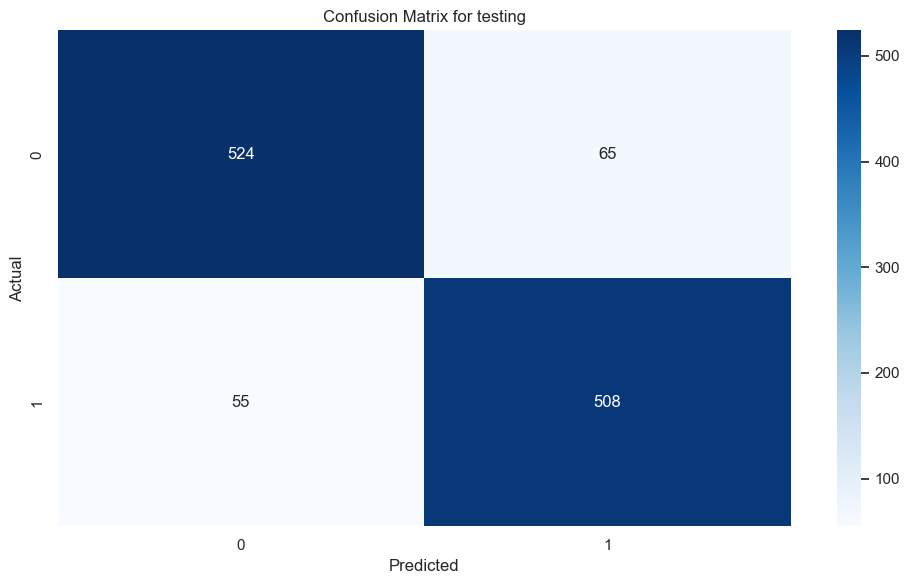

In [156]:
# Confusion Matrix for testing
RF_conf_matrix_test = confusion_matrix(y_test, RF_test_pred)
print("Confusion Matrix:\n", RF_conf_matrix_test)

# Set up the subplots
plt.figure(figsize=(10, 6))

# Plotting Confusion Matrix for testing
sns.heatmap(RF_conf_matrix_test, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix for testing')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Show plots
plt.tight_layout()
plt.show()

In [157]:
# Classification Report for Testing
RF_class_report_test = classification_report(y_test, RF_test_pred)
print("Classification Report for Testing:\n", RF_class_report_test)

Classification Report for Testing:
               precision    recall  f1-score   support

           0       0.91      0.89      0.90       589
           1       0.89      0.90      0.89       563

    accuracy                           0.90      1152
   macro avg       0.90      0.90      0.90      1152
weighted avg       0.90      0.90      0.90      1152



Test ROC AUC Score: 0.895976261056009


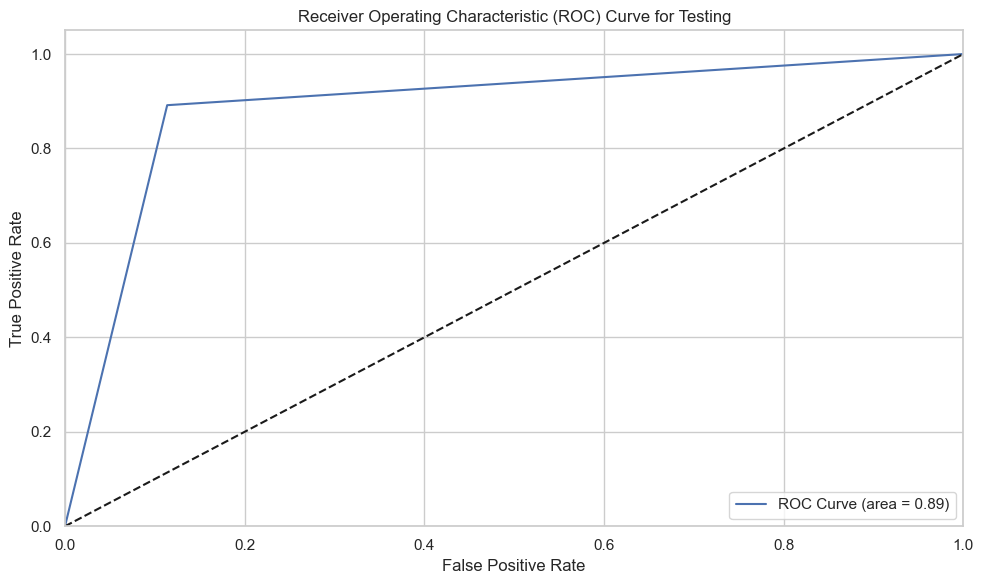

In [158]:
# ROC AUC Score for testing
RF_test_roc_auc = roc_auc_score(y_test, RF_test_pred)
print("Test ROC AUC Score:", RF_test_roc_auc)

# Set up the subplots
plt.figure(figsize=(10, 6))

# Plotting ROC Curve for Testing
fpr, tpr, thresholds = roc_curve(y_test, rf_test_pred)
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % rf_test_roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Testing')
plt.legend(loc="lower right")

# Show plots
plt.tight_layout()
plt.show()

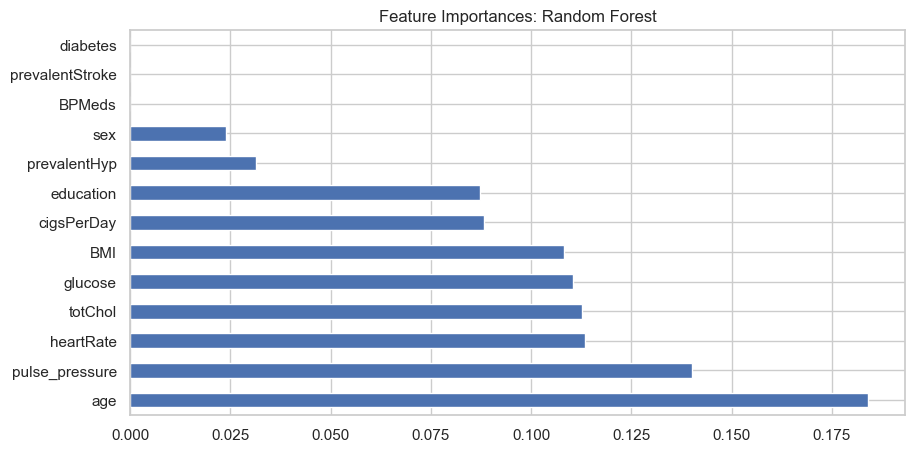

In [159]:
# Feature importances
RF_feat_imp = pd.Series(RF_model.feature_importances_, index=x.columns)
plt.figure(figsize=(10, 5))
plt.title('Feature Importances: Random Forest')
plt.xlabel('Relative Importance')
RF_feat_imp.nlargest(20).plot(kind='barh')
plt.show()

## 6) XGBoost

In [160]:
# Create a XG Boost classifier
xgb_model = XGBClassifier()

# Train the classifier
xgb_model.fit(x_train, y_train)

# Predictions on the training data
xgb_train_pred = xgb_model.predict(x_train)

# Predictions on the testing data
xgb_test_pred = xgb_model.predict(x_test)

In [161]:
# Evaluating the model
xgb_train_accuracy = accuracy_score(y_train, xgb_train_pred)
print("Train Accuracy of XG Boost:", xgb_train_accuracy)

print("********"*10)

xgb_test_accuracy = accuracy_score(y_test, xgb_test_pred)
print("Test Accuracy of XG Boost:", xgb_test_accuracy)

Train Accuracy of XG Boost: 0.9945722970039079
********************************************************************************
Test Accuracy of XG Boost: 0.8854166666666666


In [162]:
# Train recall
xgb_train_recall = recall_score(y_train, xgb_train_pred)
print("Train Recall Score of XG Boost:", xgb_train_recall)

print("*******"*10)

# Test recall
xgb_test_recall = recall_score(y_test, xgb_test_pred)
print("Test Recall Score of XG Boost:", xgb_test_recall)

Train Recall Score of XG Boost: 0.9892055267702936
**********************************************************************
Test Recall Score of XG Boost: 0.8632326820603907


In [163]:
# Confusion Matrix for training
xgb_conf_matrix_train = confusion_matrix(y_train, xgb_train_pred)
print("Confusion Matrix:\n", xgb_conf_matrix_train)

print("*****"*10)

# Confusion Matrix for testing
xgb_conf_matrix_test = confusion_matrix(y_test, xgb_test_pred)
print("Confusion Matrix:\n", xgb_conf_matrix_test)

Confusion Matrix:
 [[2290    0]
 [  25 2291]]
**************************************************
Confusion Matrix:
 [[534  55]
 [ 77 486]]


In [164]:
# Classification Report for Training
xgb_class_report_train = classification_report(y_train, xgb_train_pred)
print("Classification Report for Traing:\n", xgb_class_report_train)

print("*******"*10)

# Classification Report for Testing
xgb_class_report_test = classification_report(y_test, xgb_test_pred)
print("Classification Report for Testing:\n", xgb_class_report_test)

Classification Report for Traing:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      2290
           1       1.00      0.99      0.99      2316

    accuracy                           0.99      4606
   macro avg       0.99      0.99      0.99      4606
weighted avg       0.99      0.99      0.99      4606

**********************************************************************
Classification Report for Testing:
               precision    recall  f1-score   support

           0       0.87      0.91      0.89       589
           1       0.90      0.86      0.88       563

    accuracy                           0.89      1152
   macro avg       0.89      0.88      0.89      1152
weighted avg       0.89      0.89      0.89      1152



In [165]:
# ROC AUC Score for training
xgb_train_roc_auc = roc_auc_score(y_train, xgb_train_pred)
print("Train ROC AUC Score:", xgb_train_roc_auc)

print("*******"*10)

# ROC AUC Score for testing
xgb_test_roc_auc = roc_auc_score(y_test, xgb_test_pred)
print("Test ROC AUC Score:", xgb_test_roc_auc)

Train ROC AUC Score: 0.9946027633851469
**********************************************************************
Test ROC AUC Score: 0.8849270371252718


### HyperParameter Tunning - GridSearchCV

In [166]:
from sklearn.model_selection import GridSearchCV

# Create an instance of XGBoost classifier
xgb_model = XGBClassifier()

# Define the parameter grid for XGBoost
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7]
}

# Create GridSearchCV instance
xgb_grid_search = GridSearchCV(estimator=xgb_model,
                           param_grid=param_grid,
                           cv=5,  # 5-fold cross-validation
                           scoring='recall',  # Use recall as the evaluation metric
                           verbose=2,  # Print detailed information
                           n_jobs=-1)  # Use all available CPU cores

# Fit GridSearchCV to the training data
xgb_grid_search.fit(x_train, y_train)

# Get the best hyperparameters
best_params = xgb_grid_search.best_params_

# Print the best parameters
print("Best Parameters:", best_params)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300}


In [167]:
# Create a new XGBoost classifier with the best hyperparameters
XGB_model = XGBClassifier(learning_rate=best_params['learning_rate'],
                               n_estimators=best_params['n_estimators'],
                               max_depth=best_params['max_depth'])

# Fit the model
XGB_model.fit(x_train, y_train)

# Predictions on the training data
XGB_train_pred = XGB_model.predict(x_train)

# Predictions on the testing data
XGB_test_pred = XGB_model.predict(x_test)

In [168]:
# Evaluating the model
XGB_test_accuracy = accuracy_score(y_test, XGB_test_pred)
print("Test Accuracy of XG Boost:", XGB_test_accuracy)

Test Accuracy of XG Boost: 0.8975694444444444


In [169]:
# Test recall
XGB_test_recall = recall_score(y_test,XGB_test_pred)
print("Test Recall Score of XG Boost:", XGB_test_recall)

Test Recall Score of XG Boost: 0.8632326820603907


Confusion Matrix:
 [[548  41]
 [ 77 486]]


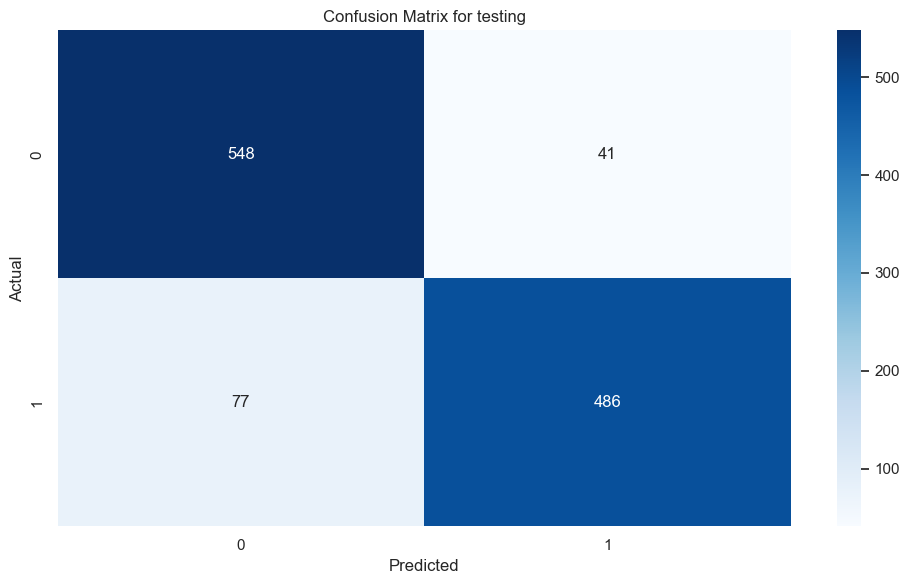

In [170]:
# Confusion Matrix for testing
XGB_conf_matrix_test = confusion_matrix(y_test, XGB_test_pred)
print("Confusion Matrix:\n", XGB_conf_matrix_test)

# Set up the subplots
plt.figure(figsize=(10, 6))

# Plotting Confusion Matrix for testing
sns.heatmap(XGB_conf_matrix_test, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix for testing')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Show plots
plt.tight_layout()
plt.show()

In [171]:
# Classification Report for Testing
XGB_class_report_test = classification_report(y_test, XGB_test_pred)
print("Classification Report for Testing:\n", XGB_class_report_test)

Classification Report for Testing:
               precision    recall  f1-score   support

           0       0.88      0.93      0.90       589
           1       0.92      0.86      0.89       563

    accuracy                           0.90      1152
   macro avg       0.90      0.90      0.90      1152
weighted avg       0.90      0.90      0.90      1152



Test ROC AUC Score: 0.8968115872101615


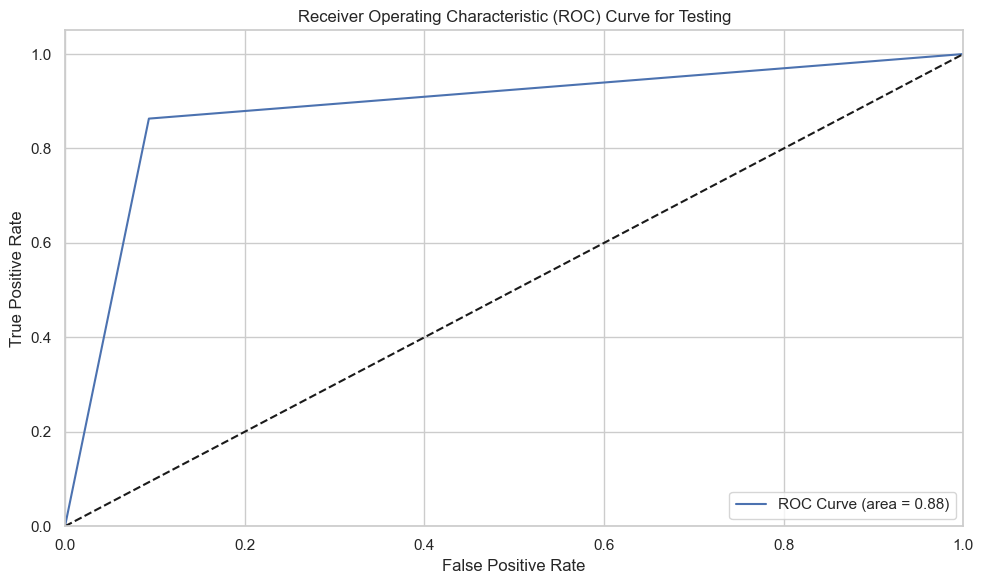

In [172]:
# ROC AUC Score for testing
XGB_test_roc_auc = roc_auc_score(y_test, XGB_test_pred)
print("Test ROC AUC Score:", XGB_test_roc_auc)

# Set up the subplots
plt.figure(figsize=(10, 6))

# Plotting ROC Curve for Testing
fpr, tpr, thresholds = roc_curve(y_test, xgb_test_pred)
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % xgb_test_roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Testing')
plt.legend(loc="lower right")

# Show plots
plt.tight_layout()
plt.show()

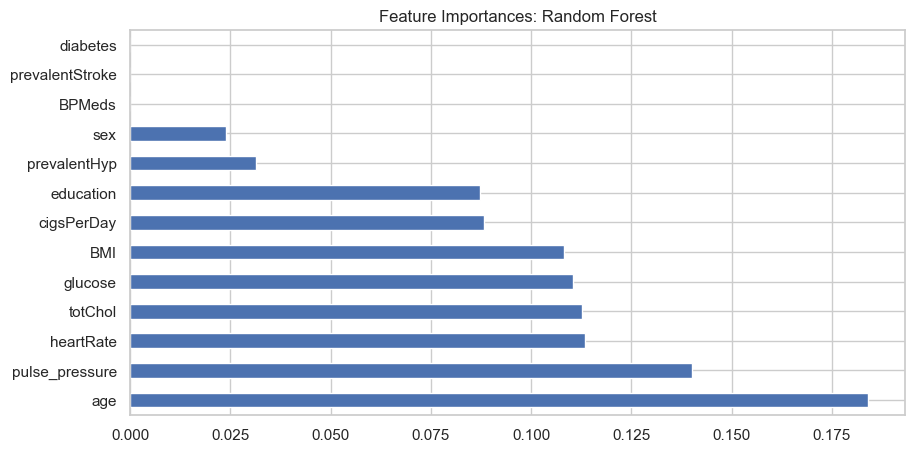

In [173]:
# Feature importances
XGB_feat_imp = pd.Series(XGB_model.feature_importances_, index=x.columns)
plt.figure(figsize=(10, 5))
plt.title('Feature Importances: Random Forest')
plt.xlabel('Relative Importance')
RF_feat_imp.nlargest(20).plot(kind='barh')
plt.show()

In [178]:
data = {
    'Model Name': ['Logistic Regression', 'KNN', 'Naive Bayes', 'Decision Tree', 'Random Forest', 'XG Boost'],
    'Accuracy Score': [0.68, 0.86, 0.66, 0.73, 0.90, 0.89],
    'ROC-AUC Score': [0.68, 0.86, 0.66, 0.73, 0.90, 0.89],
    'Precision Score (0)': [0.69, 0.98, 0.67, 0.80, 0.91, 0.88],
    'Precision Score (1)': [0.67, 0.79, 0.65, 0.69, 0.89, 0.92],
    'Recall Score (0)': [0.68, 0.75, 0.67, 0.63, 0.89, 0.93],
    'Recall Score (1)': [0.68, 0.98, 0.66, 0.83, 0.90, 0.86],
    'F1-Score (0)': [0.69, 0.85, 0.67, 0.71, 0.90, 0.90],
    'F1-Score (1)': [0.68, 0.87, 0.65, 0.75, 0.89, 0.89]
}

# Creating a DataFrame
df = pd.DataFrame(data)

# Displaying the DataFrame
df


,Model Name,Accuracy Score,ROC-AUC Score,Precision Score (0),Precision Score (1),Recall Score (0),Recall Score (1),F1-Score (0),F1-Score (1)
0,Logistic Regression,0.68,0.68,0.69,0.67,0.68,0.68,0.69,0.68
1,KNN,0.86,0.86,0.98,0.79,0.75,0.98,0.85,0.87
2,Naive Bayes,0.66,0.66,0.67,0.65,0.67,0.66,0.67,0.65
3,Decision Tree,0.73,0.73,0.80,0.69,0.63,0.83,0.71,0.75
4,Random Forest,0.90,0.90,0.91,0.89,0.89,0.90,0.90,0.89
5,XG Boost,0.89,0.89,0.88,0.92,0.93,0.86,0.90,0.89


# Result

- **Random Forest have the highest accuracy scores**, indicating they have the highest overall correctness in predicting the 10-year risk of coronary heart disease.
- **KNN has the highest recall score for class 1**, indicating it identifies true positive cases.
- **Random Forest has the highest recall score for class 1**, indicating it identifies true positive cases effectively.
- **Random Forest also has the highest precision scores for class 0**, indicating fewer true negative predictions.
- **Random Forest and XG Boost have the highest F1-scores**, indicating a good balance between precision and recall.

- Therefore, based on the provided information, **Random Forest seems to be the most suitable choice for predicting the 10-year risk of Coronary Heart Disease in this scenario**.

## Insights

- CHD risk tends to increase with age, with a peak in middle age and then decreases in older age groups.
- Pulse pressure might be associated with the risk of developing CHD over the next ten years.
- An individual’s heart rate can give important clues about how their heart is doing and whether they might be at risk for heart problems over the next ten years. So heart rate is an important feature for prediction.
- Total cholesterol, Glucose, BMI, education, Cigsperday, Prevalent Hypertension and sex were the least important features in determining the risk of CHD.

### Usage:

- The project helps doctors find people who might get heart disease in the next ten years. By finding them early, talking to specialists about their health and getting help with specific things to lower their risk of getting heart disease.
- The project can contribute to raising awareness about CHD risk factors and promoting healthier lifestyles. By understanding the factors that contribute to CHD risk, individuals can make informed decisions about their health behaviours and take proactive steps to reduce their risk.
- The project findings can help researchers learn more about what causes heart disease, how it gets worse over time, and what works best to treat it. Also, leaders can use this information to come up with plans to help both individuals and whole groups of people lower their risk of heart disease.

### Summary

- We trained 6 different Machine Learning models using a training dataset. Some of these models were fine-tuned with hyperparameter tuning to make them perform better.
- Before building the models, missing values were handled, feature engineering and feature selection was performed. We also used a technique called SMOTE to balance the dataset and reduce bias.
- When evaluating our models, we focused on something called "recall." This means we really wanted to minimize the number of false negatives - cases where the model wrongly predicts that someone is not at risk for heart disease when they actually are.

**_______________________End of the project_______________________**